In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from helperFunctions import createDataSet

In [3]:
file = "../../data/Ohio2020_processed/train/540-ws-training_processed.csv"
data = createDataSet(file)

In [7]:
def train_model(data, model, train = True):
    # Random seed from reproducibility
    # random.Random(42).shuffle(carbIntake)
    # Perform train-test split on the combined DataFrame
    

    # Data is scaled using MinMaxScaler to ensure that all features are within the same range, typically between 0 and 1.
    scaler = MinMaxScaler()

    X_train = data.drop(["cbg"], axis=1)
    y_train = data["cbg"]

    carbInput = data[data["carbInput"] > 0]

    X_train_scaled = scaler.fit_transform(X_train)
    y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

    # Linear Regression
    # Train the linear regression model on the scaled data
    if train:
        model.fit(X_train_scaled, y_train_scaled)
    
    # Make predictions
    y_train_pred_scaled = model.predict(X_train_scaled)

    # Inver scaling
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    axs[0].plot(X_train.index, y_train, label="Ground Truth")
    axs[0].plot(X_train.index,y_train_pred, label="Prediction")
    # axs[0].plot(carbInput.index, carbInput["carbInput"], "ro")
    axs2 = axs[0].twinx()
    axs2.plot(carbInput.index, carbInput["carbInput"], "ro", label="Carb intake")
    axs[1].bar(X_train.columns.values, model.coef_[0])

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    axs[0].legend(loc="upper center")

    return  model.coef_[0]
    
    # plt.legend()

In [8]:
X_train, X_test = train_test_split(data, test_size=0.33, random_state=42)

C:\Users\alessia\AppData\Local\Temp\ipykernel_14836\1941562915.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

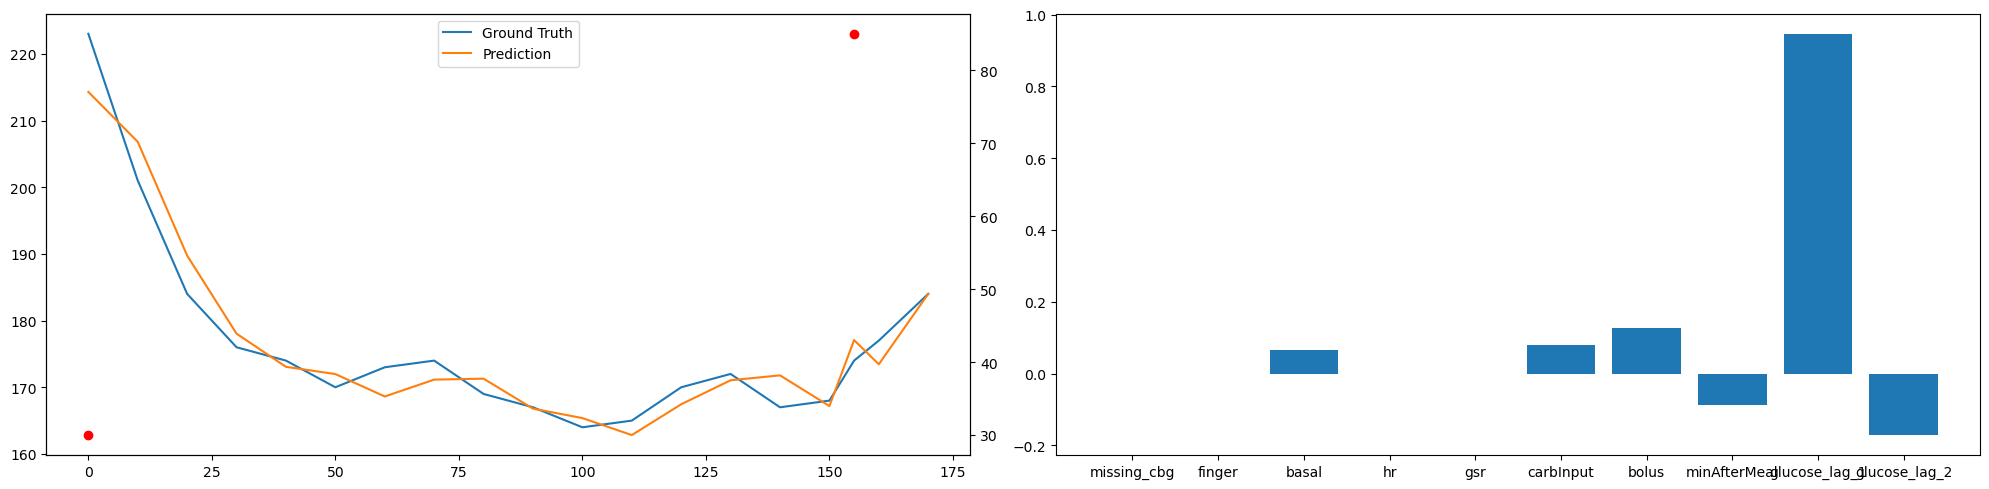

<Figure size 640x480 with 0 Axes>

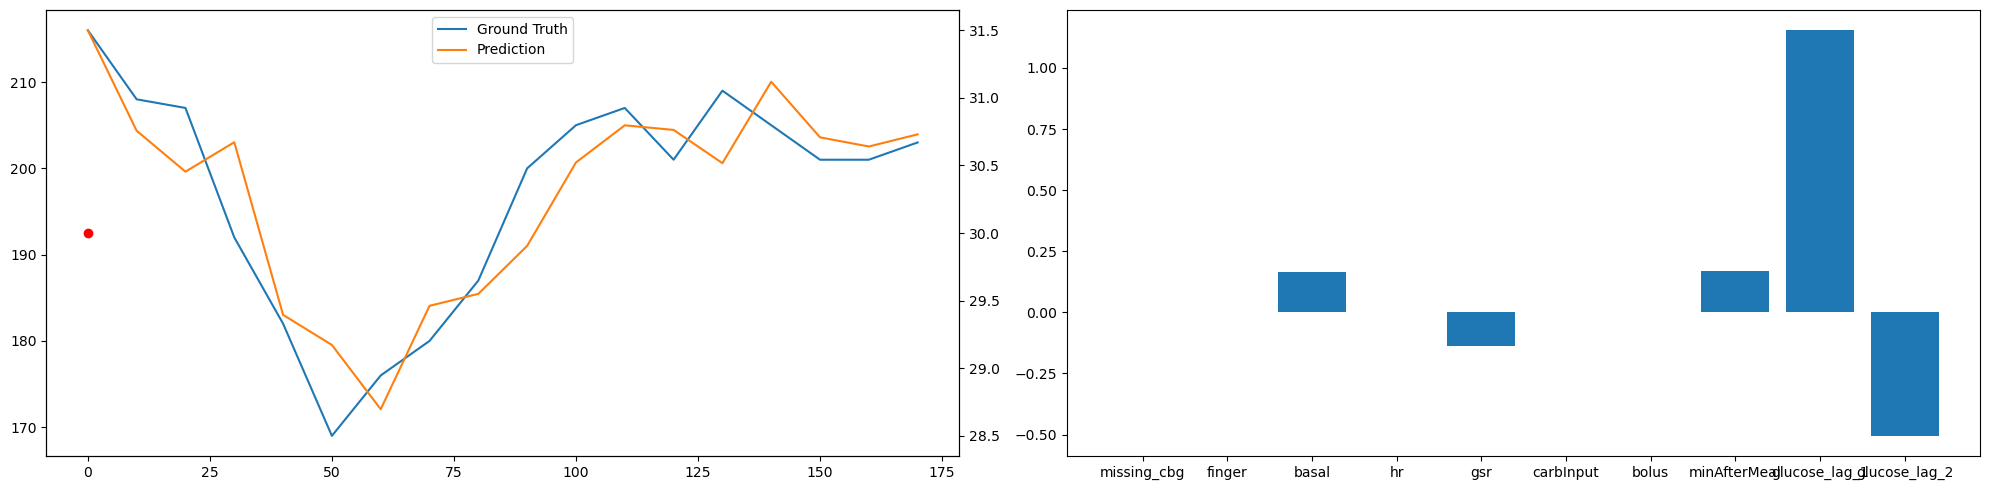

<Figure size 640x480 with 0 Axes>

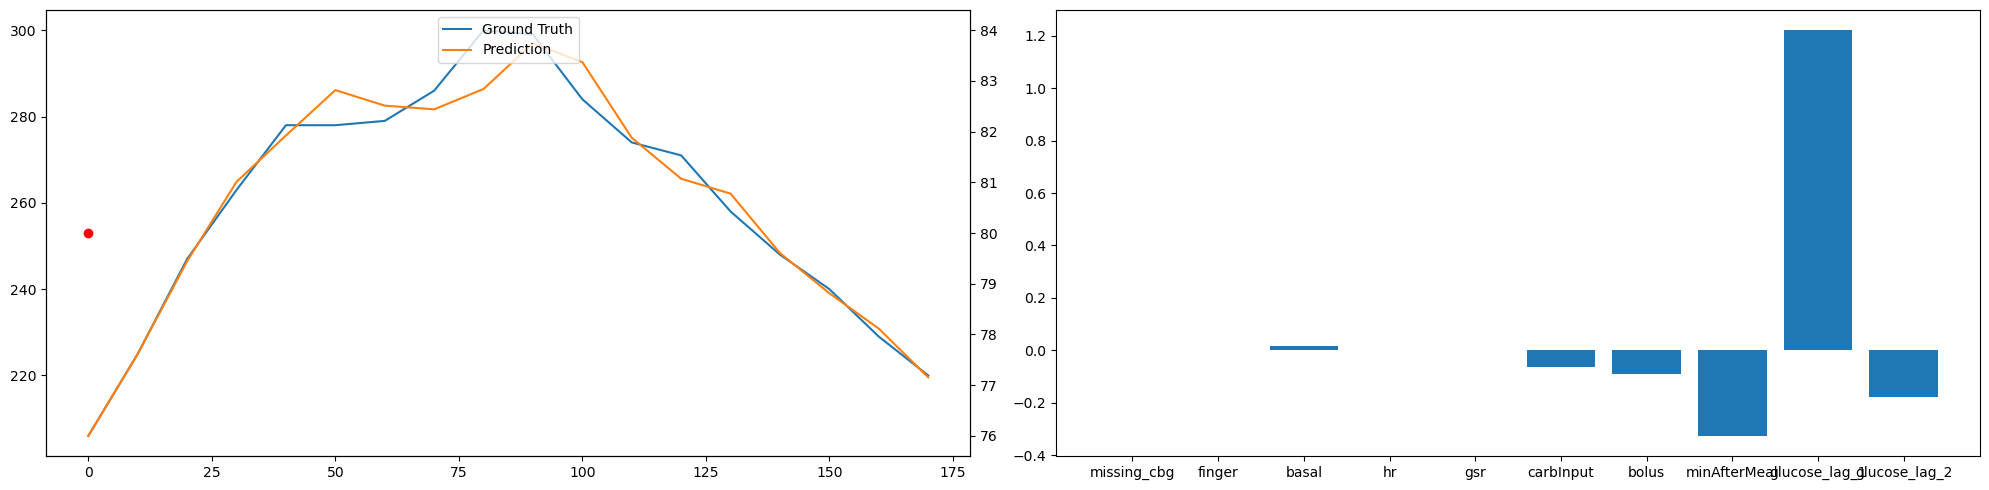

<Figure size 640x480 with 0 Axes>

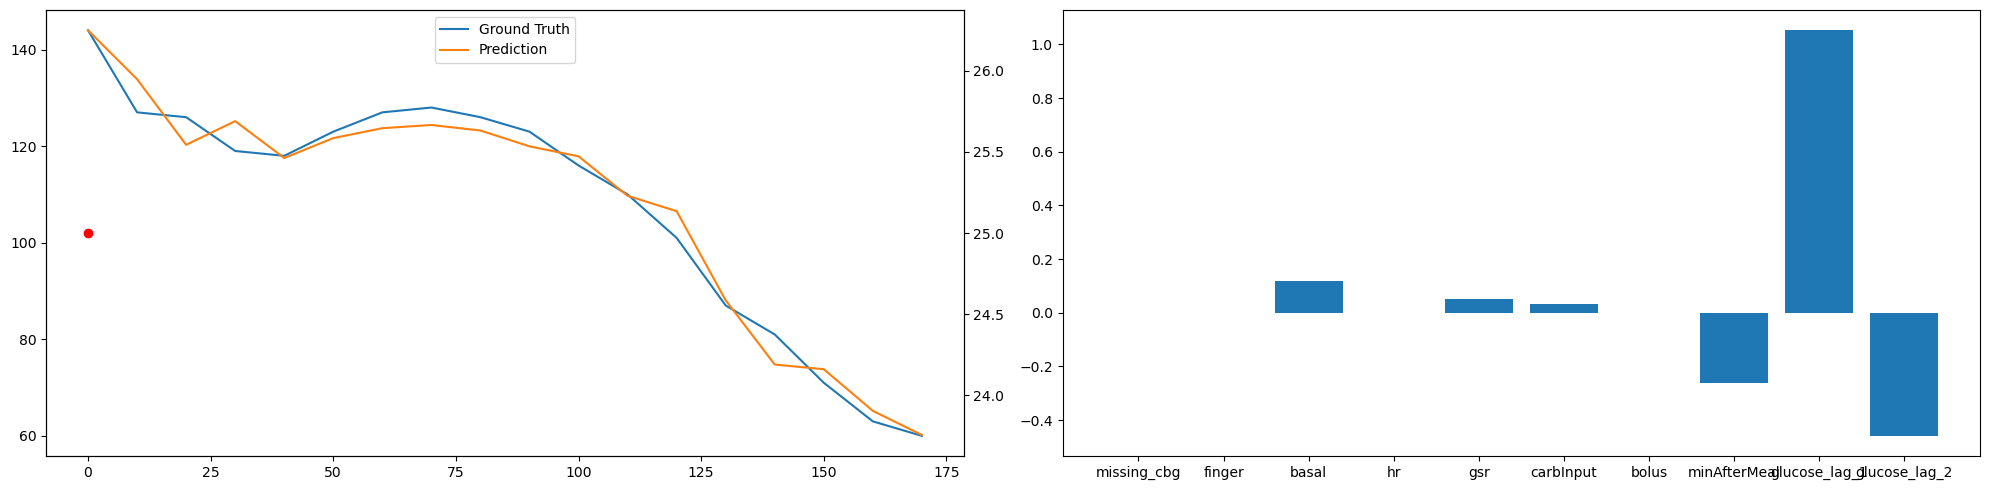

<Figure size 640x480 with 0 Axes>

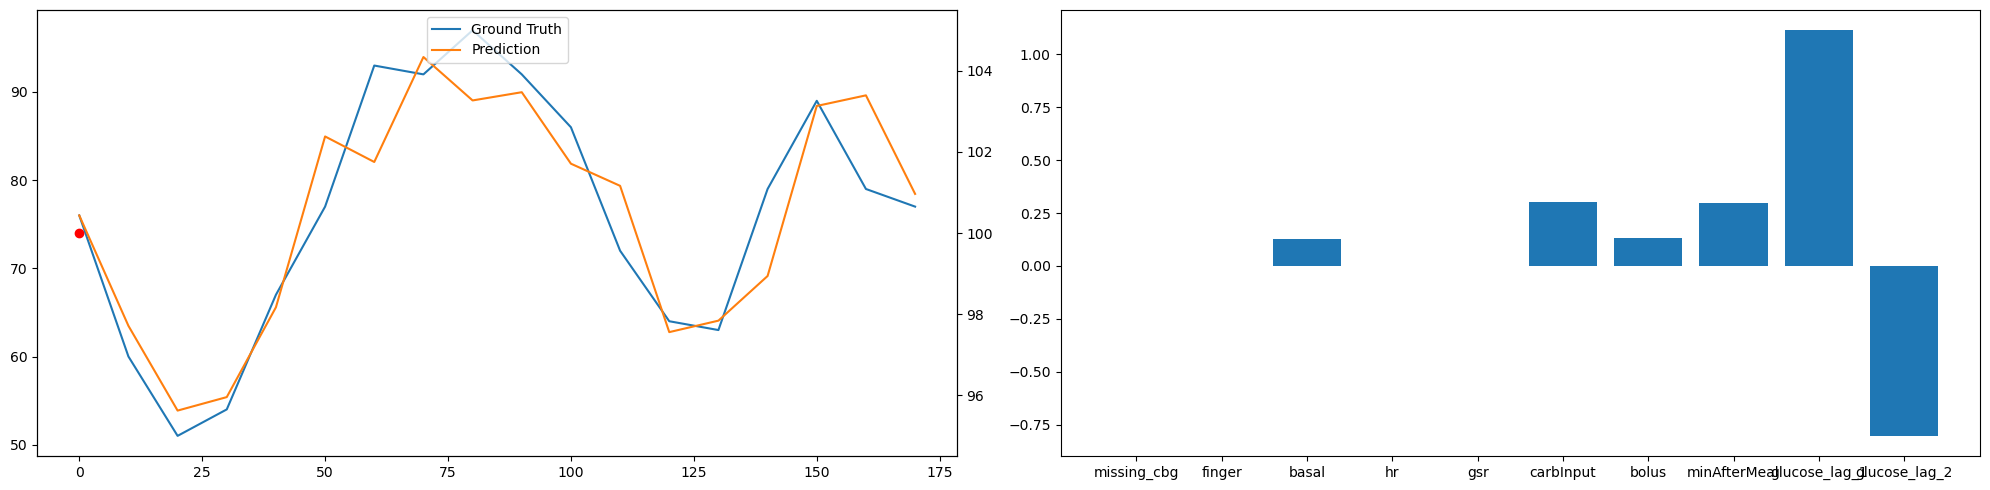

<Figure size 640x480 with 0 Axes>

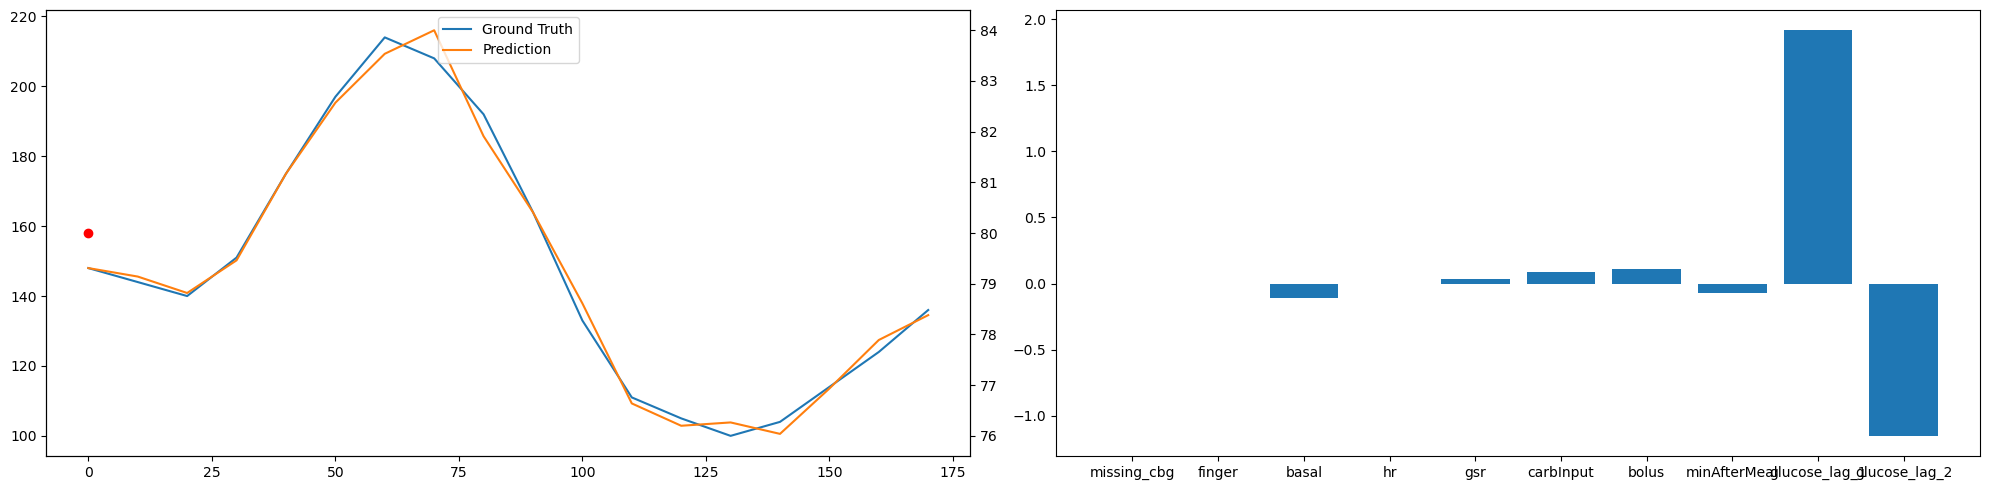

<Figure size 640x480 with 0 Axes>

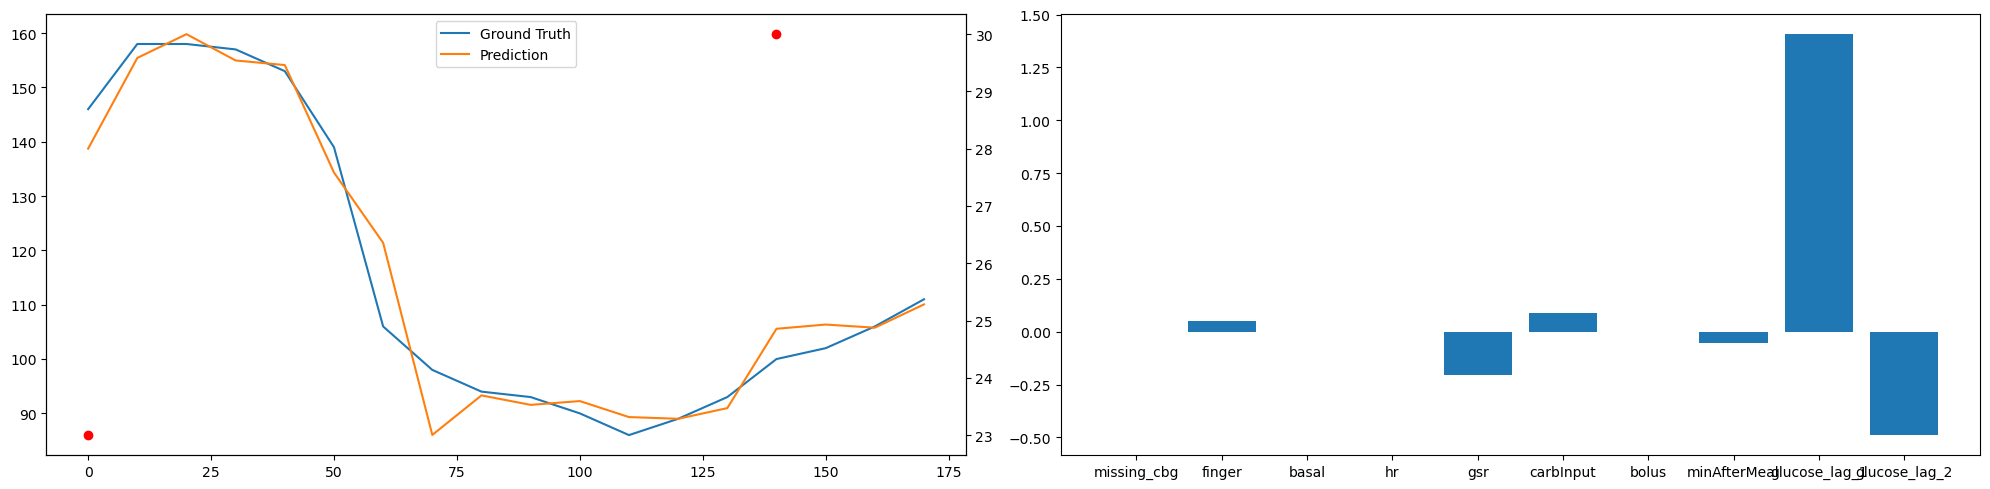

<Figure size 640x480 with 0 Axes>

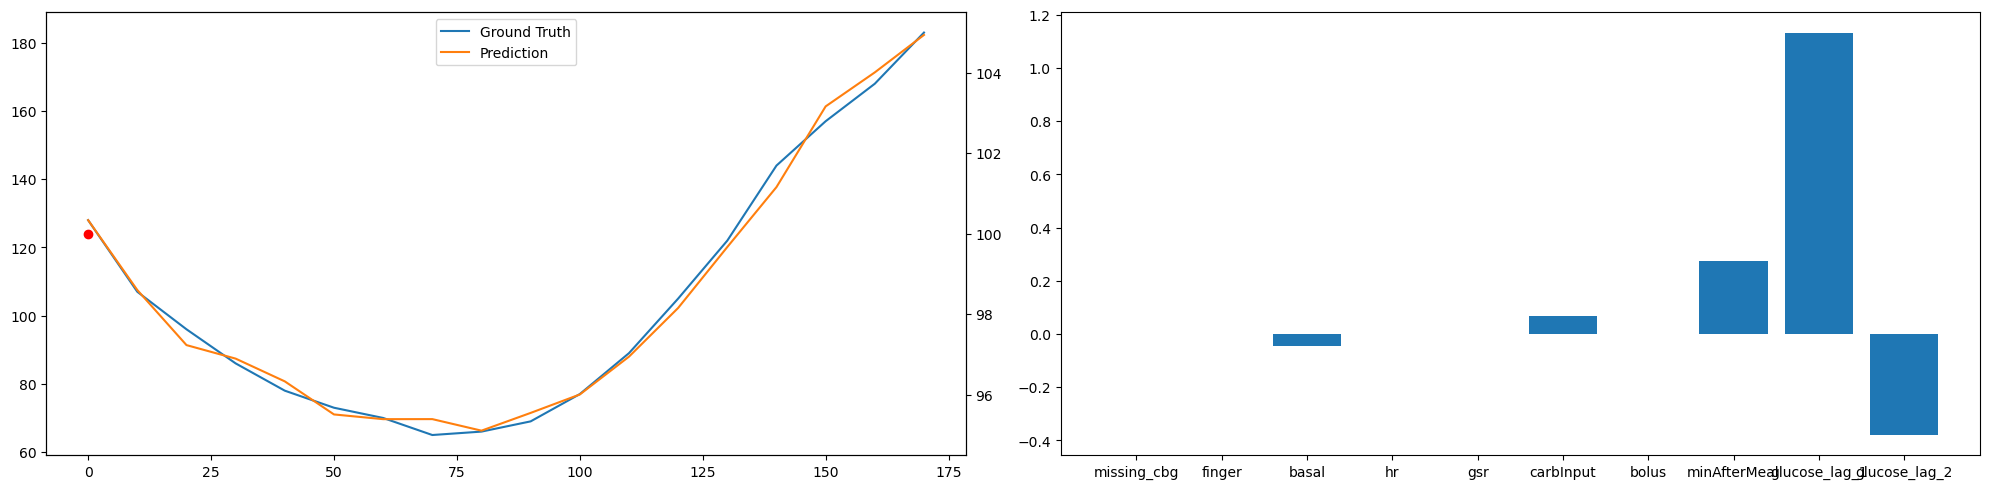

<Figure size 640x480 with 0 Axes>

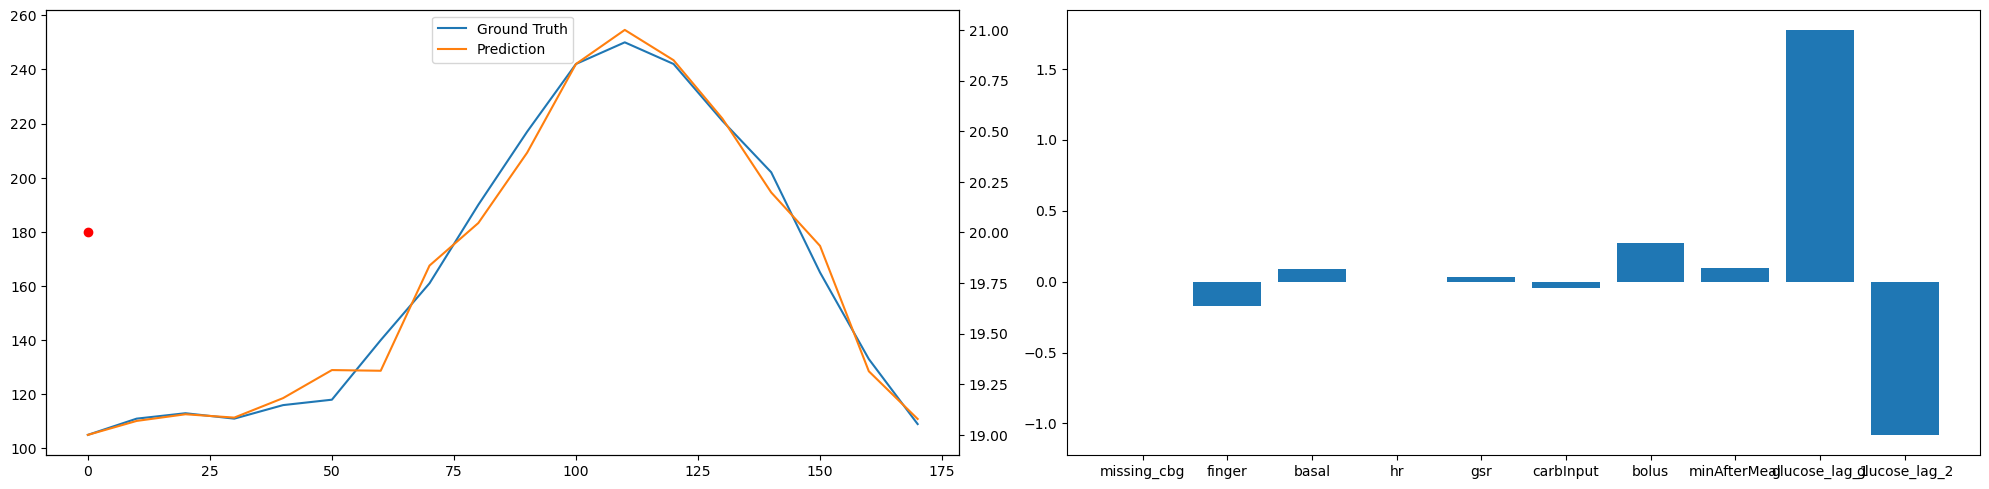

<Figure size 640x480 with 0 Axes>

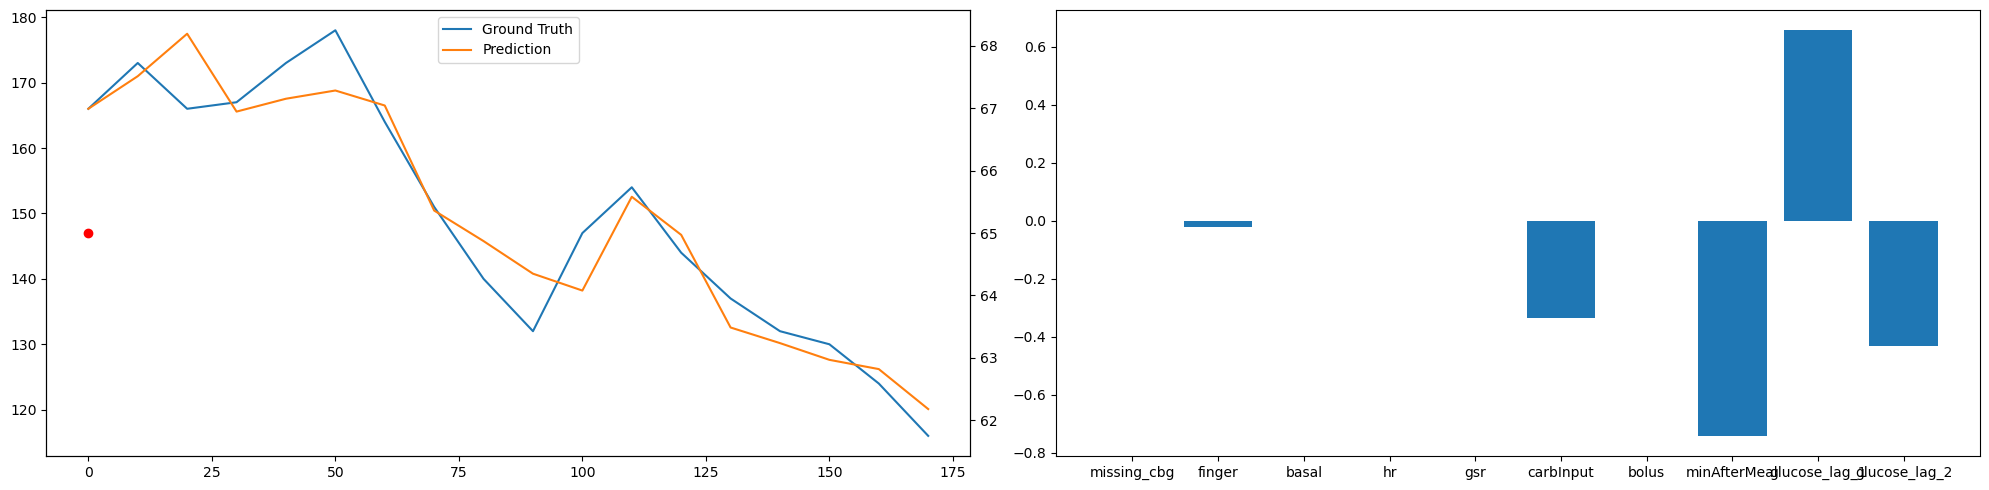

<Figure size 640x480 with 0 Axes>

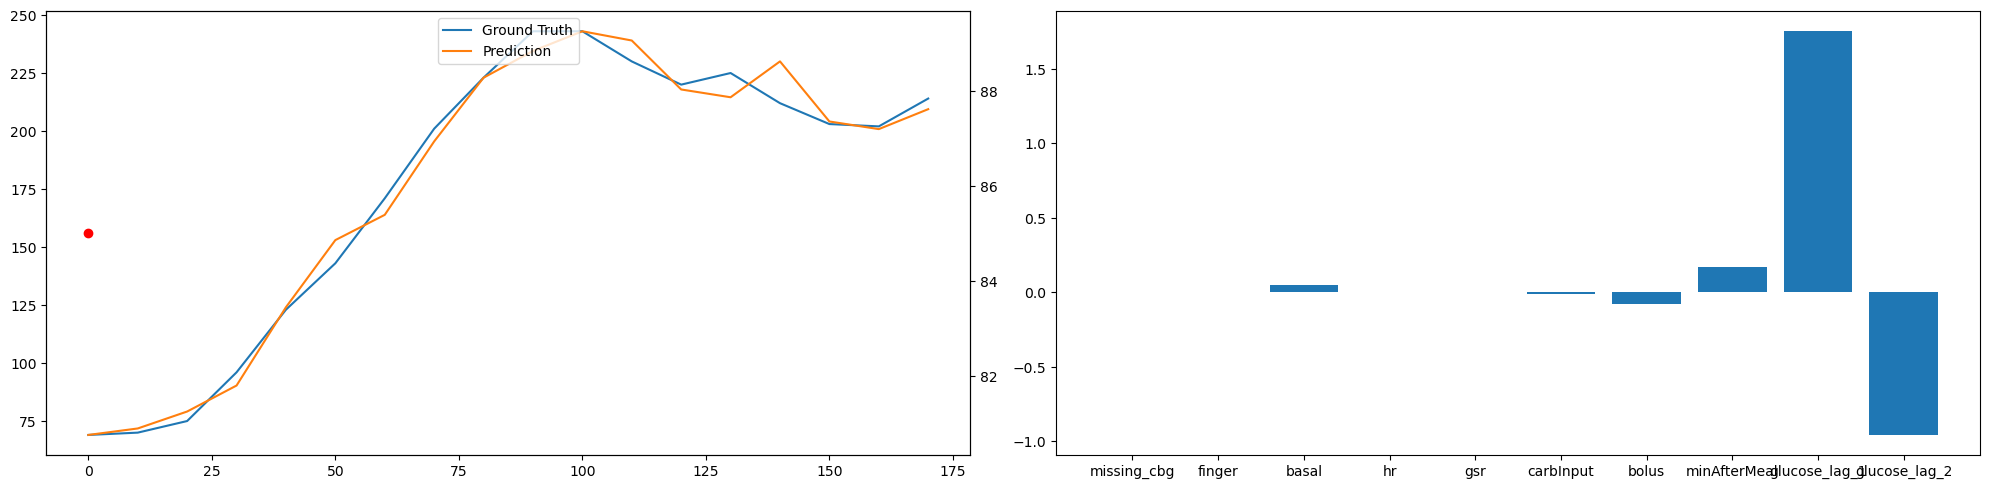

<Figure size 640x480 with 0 Axes>

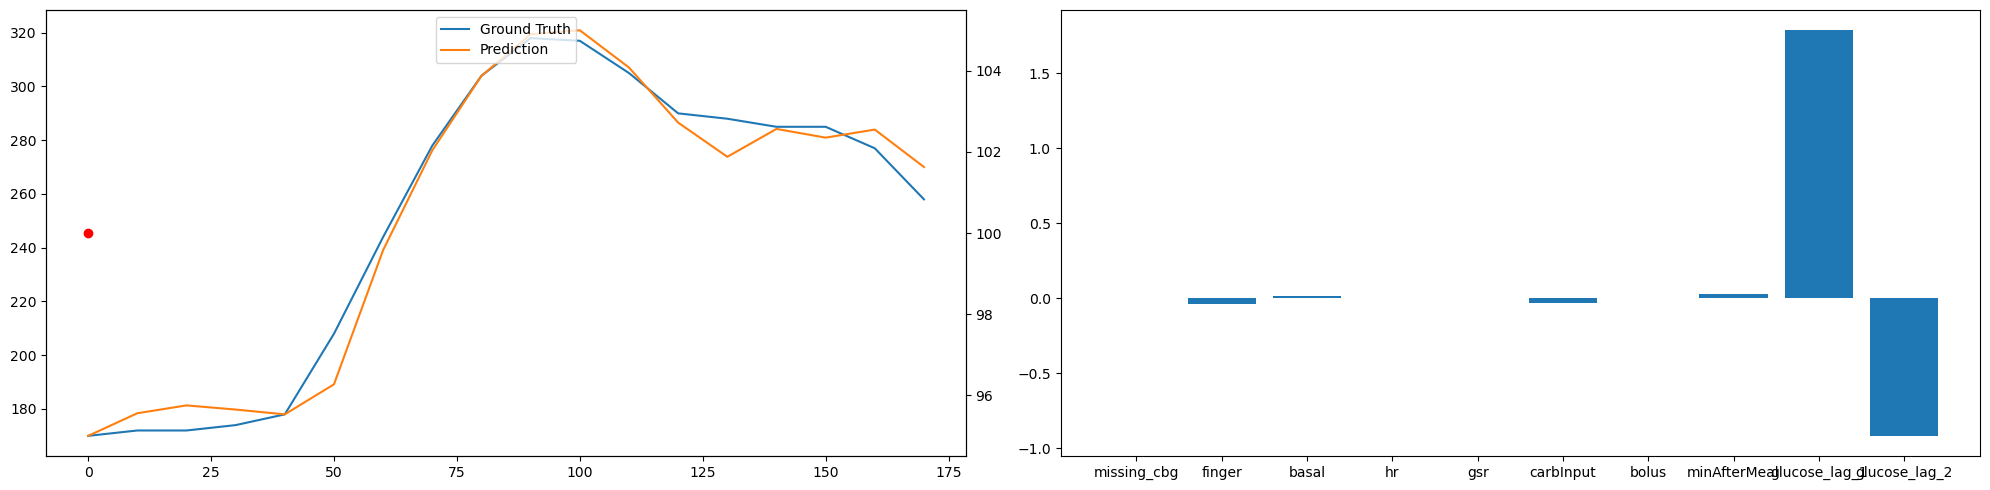

<Figure size 640x480 with 0 Axes>

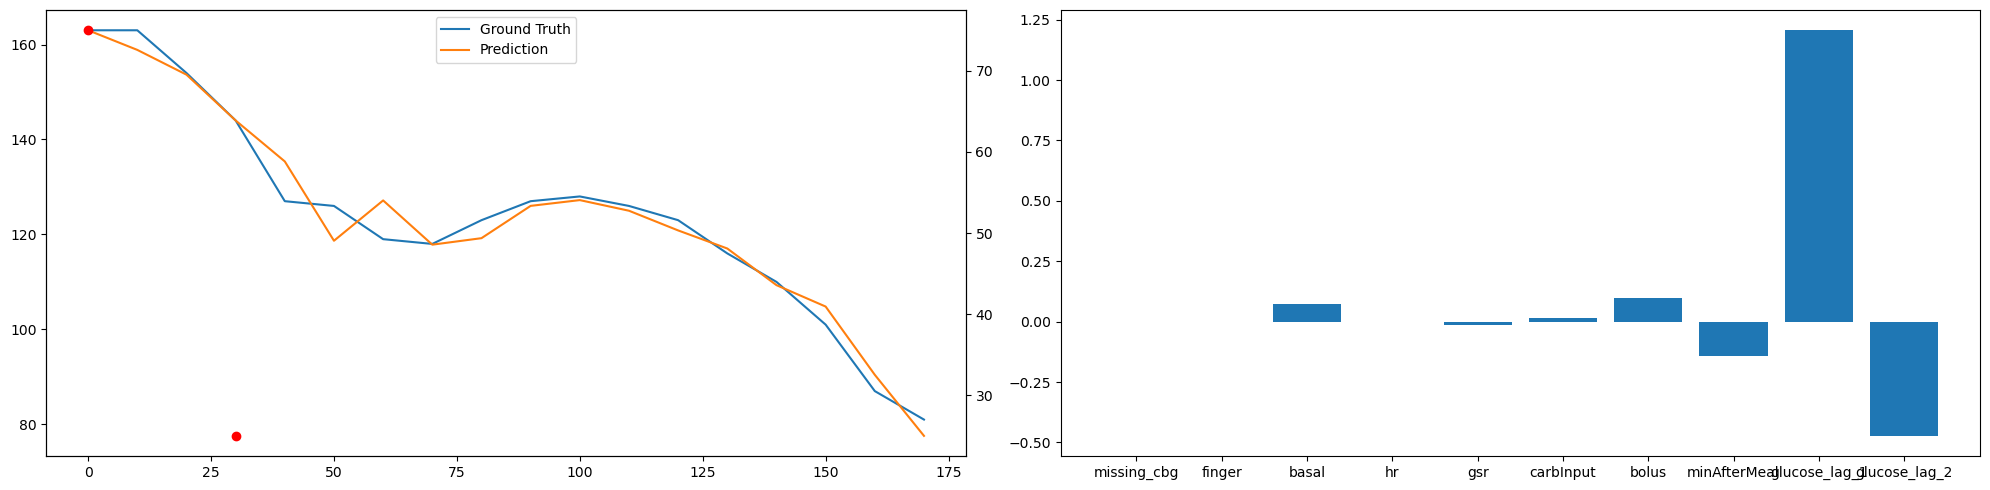

<Figure size 640x480 with 0 Axes>

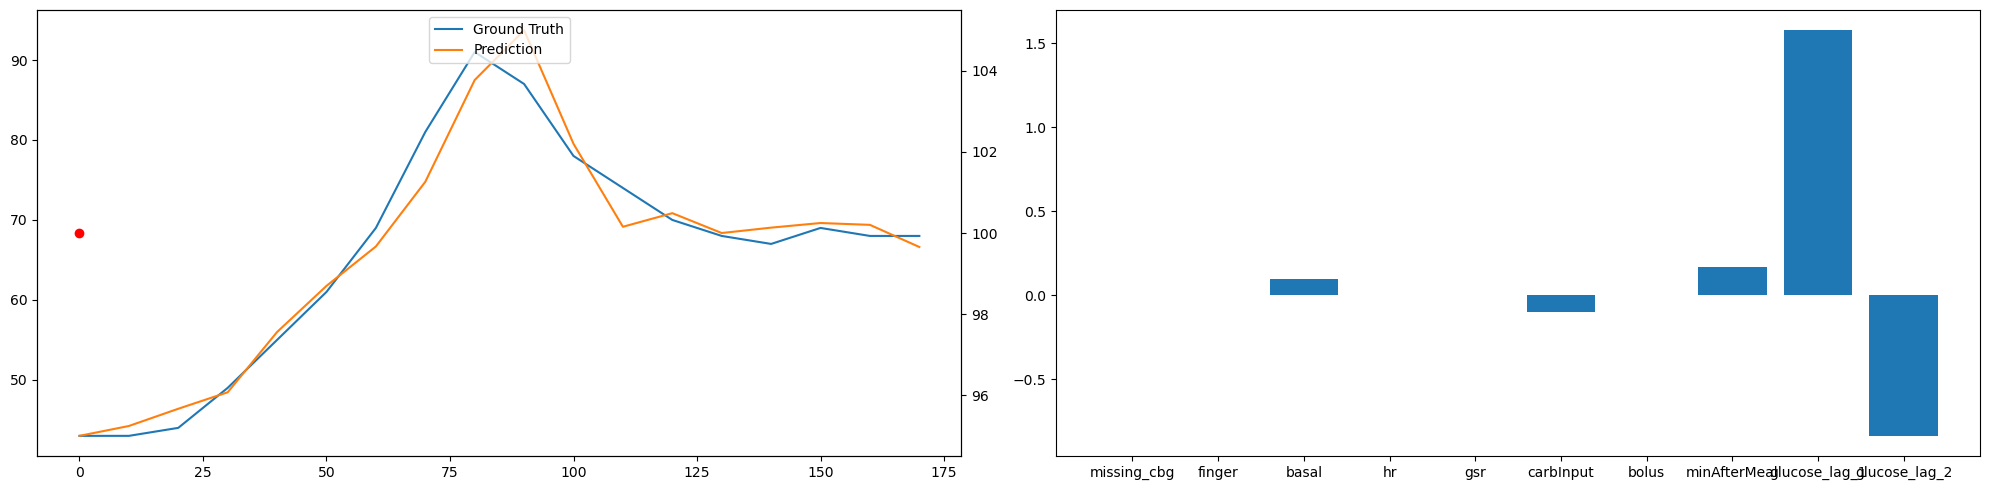

<Figure size 640x480 with 0 Axes>

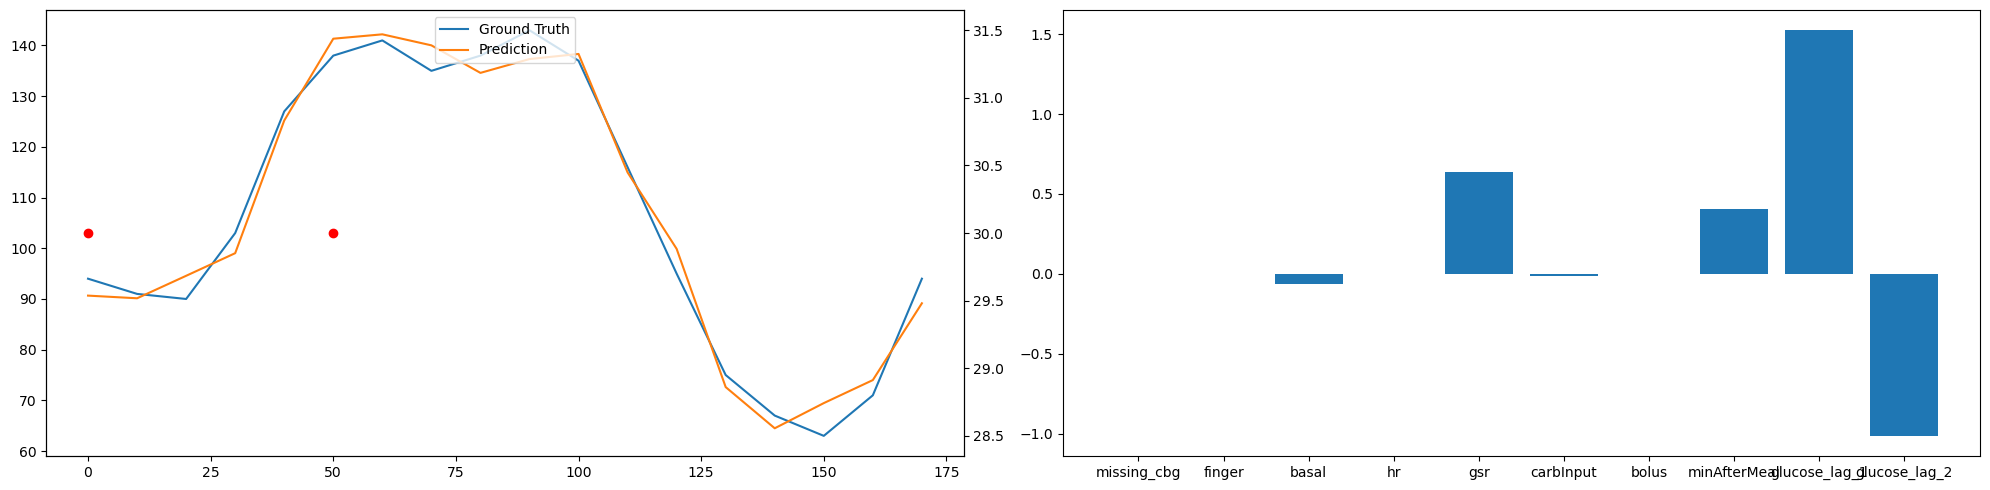

<Figure size 640x480 with 0 Axes>

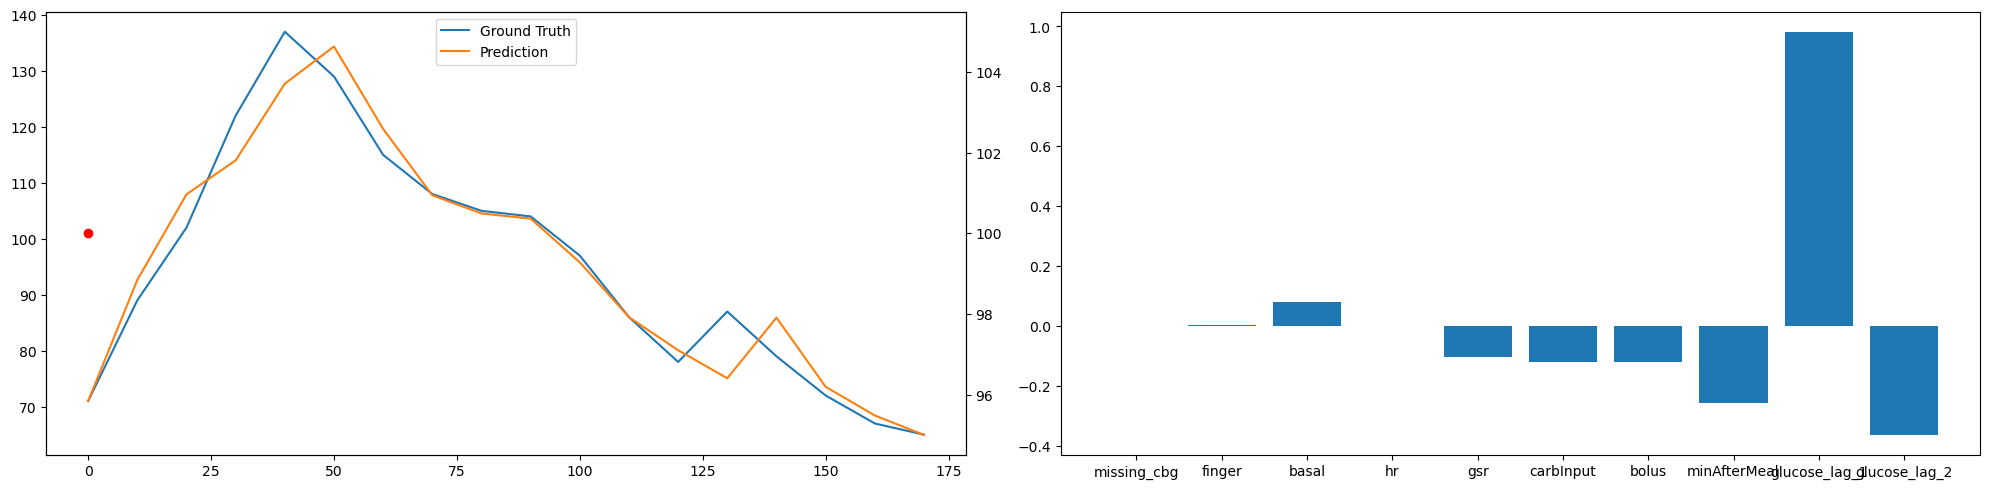

<Figure size 640x480 with 0 Axes>

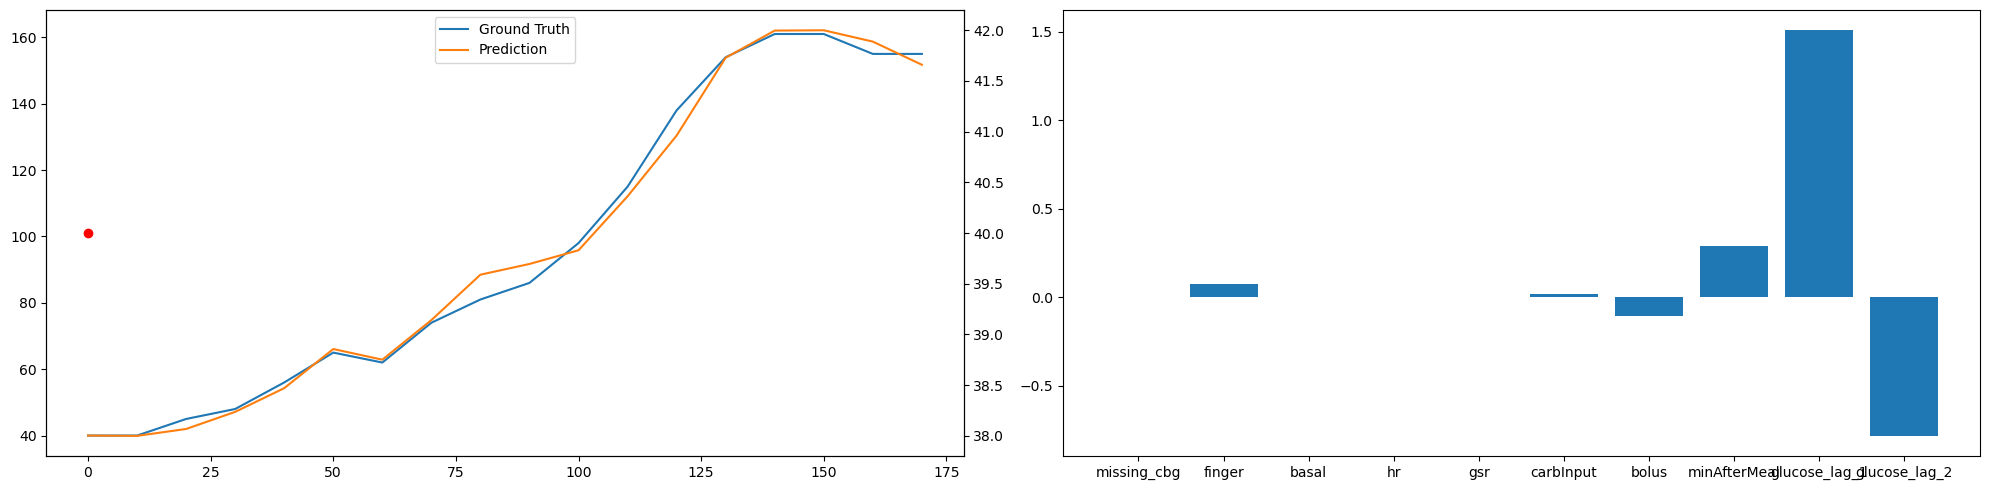

<Figure size 640x480 with 0 Axes>

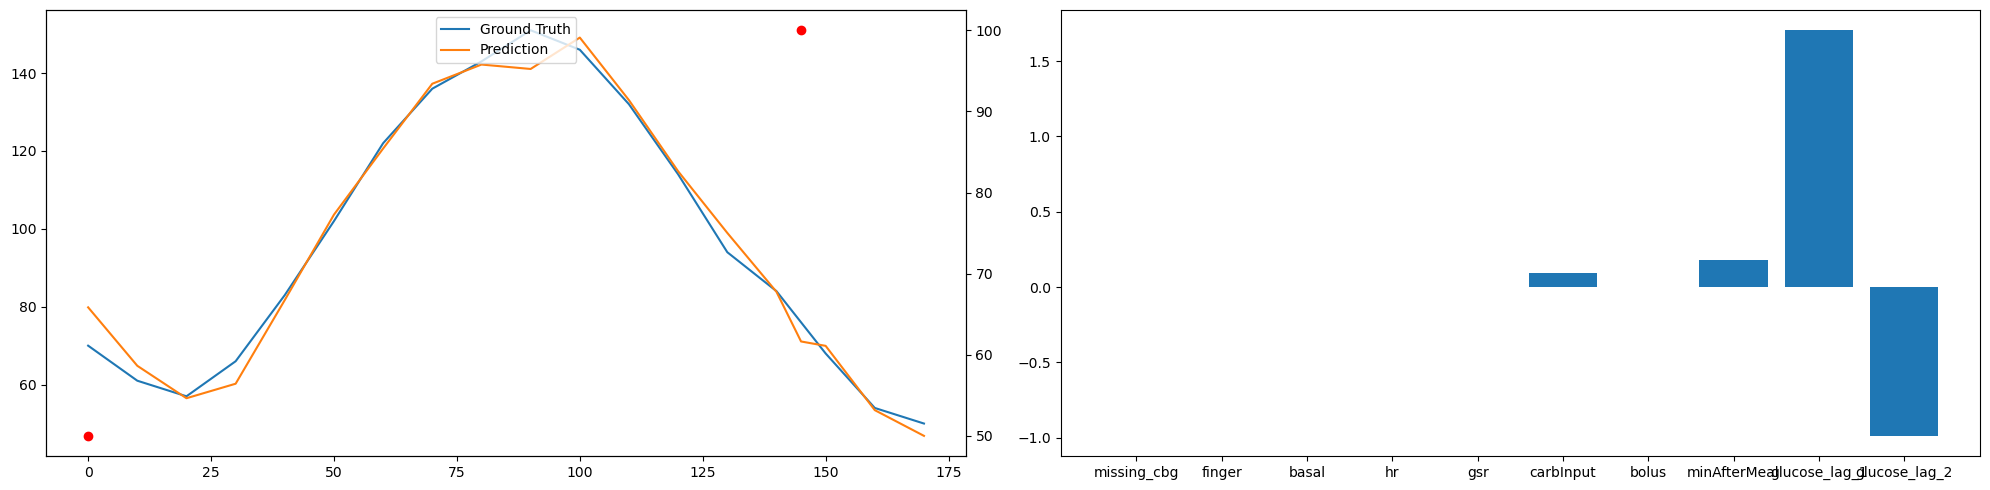

<Figure size 640x480 with 0 Axes>

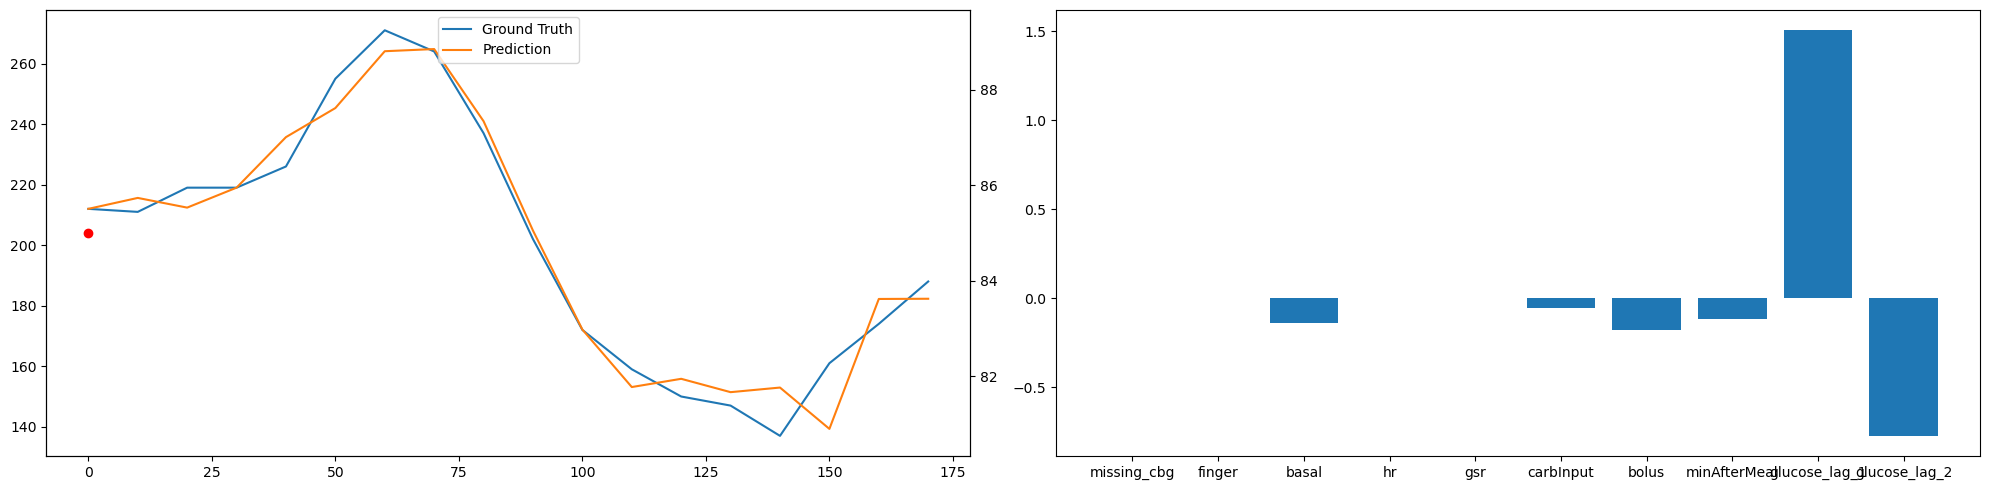

<Figure size 640x480 with 0 Axes>

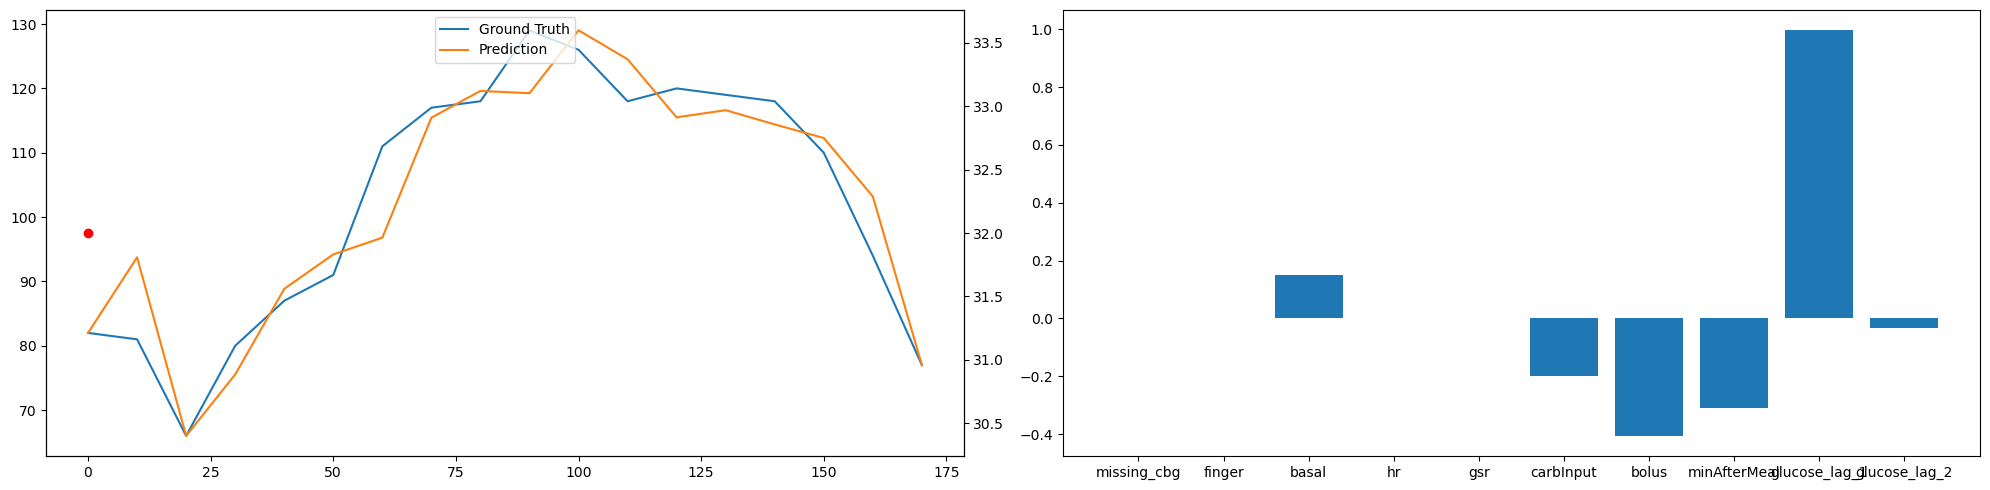

<Figure size 640x480 with 0 Axes>

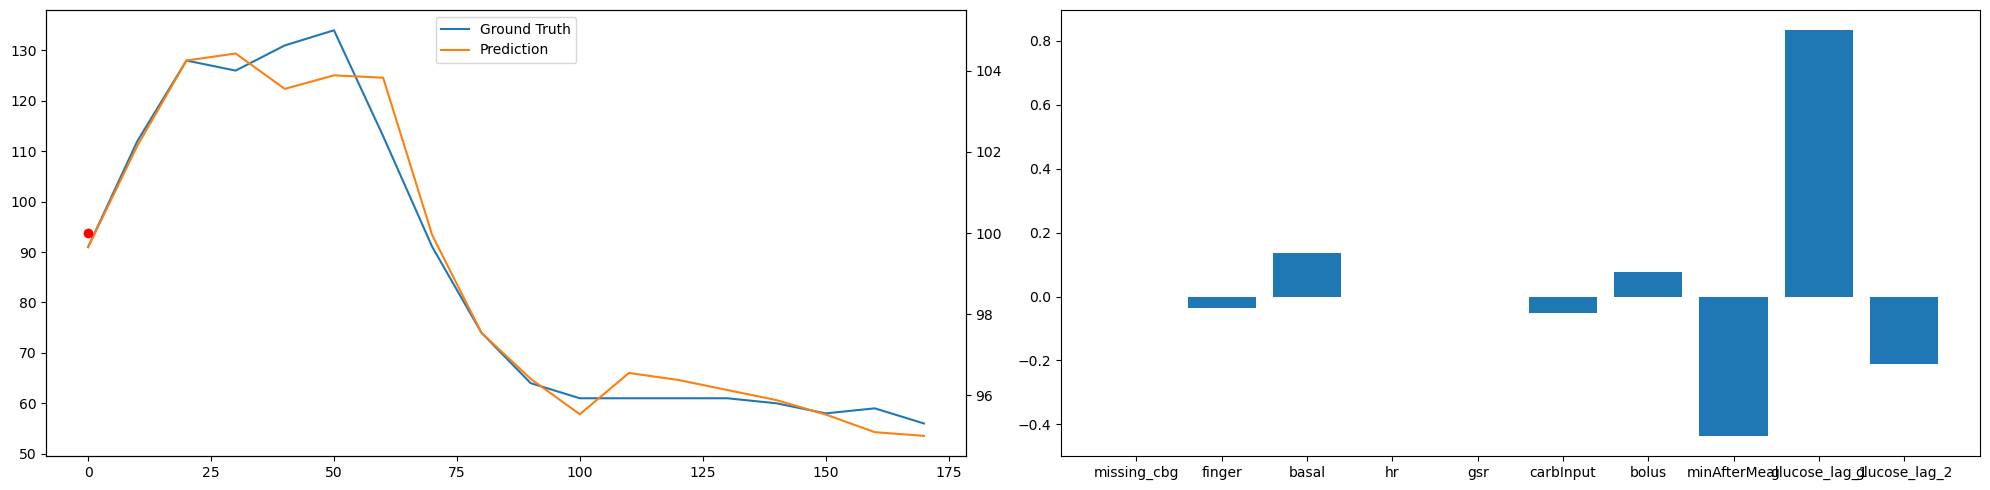

<Figure size 640x480 with 0 Axes>

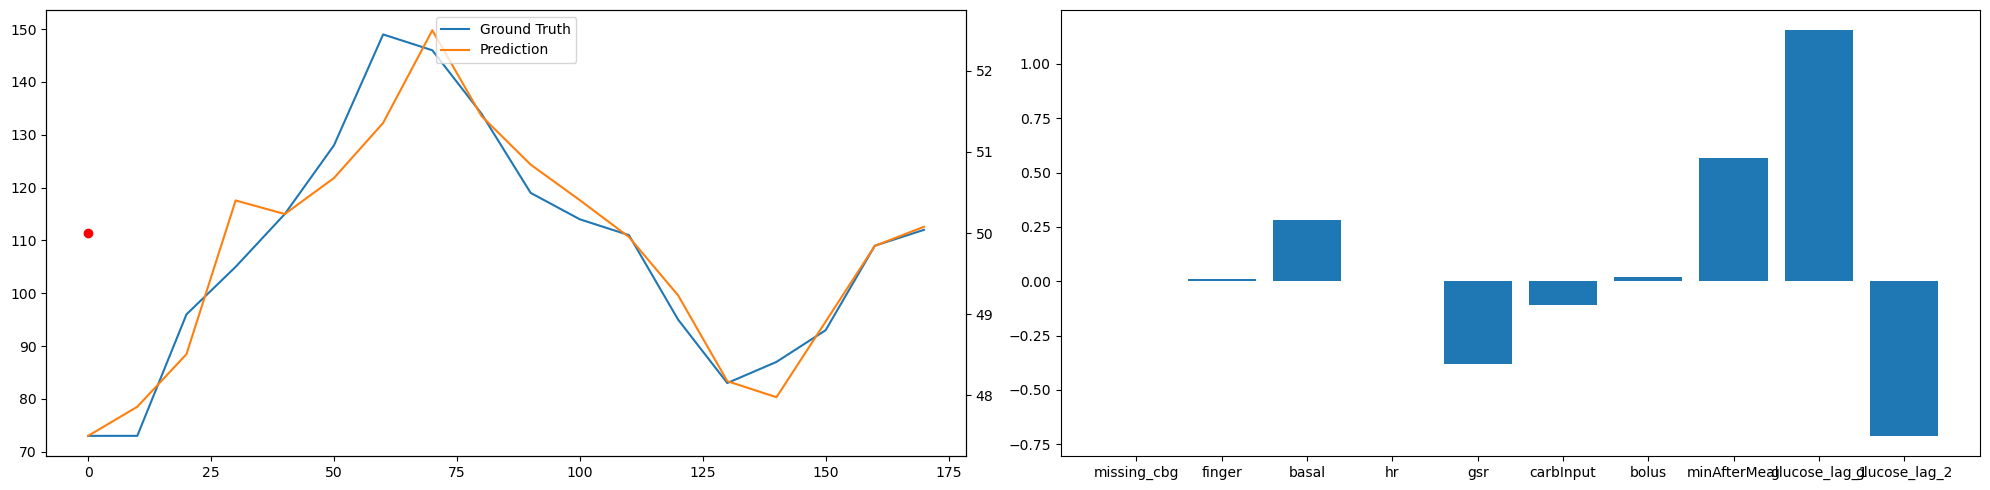

<Figure size 640x480 with 0 Axes>

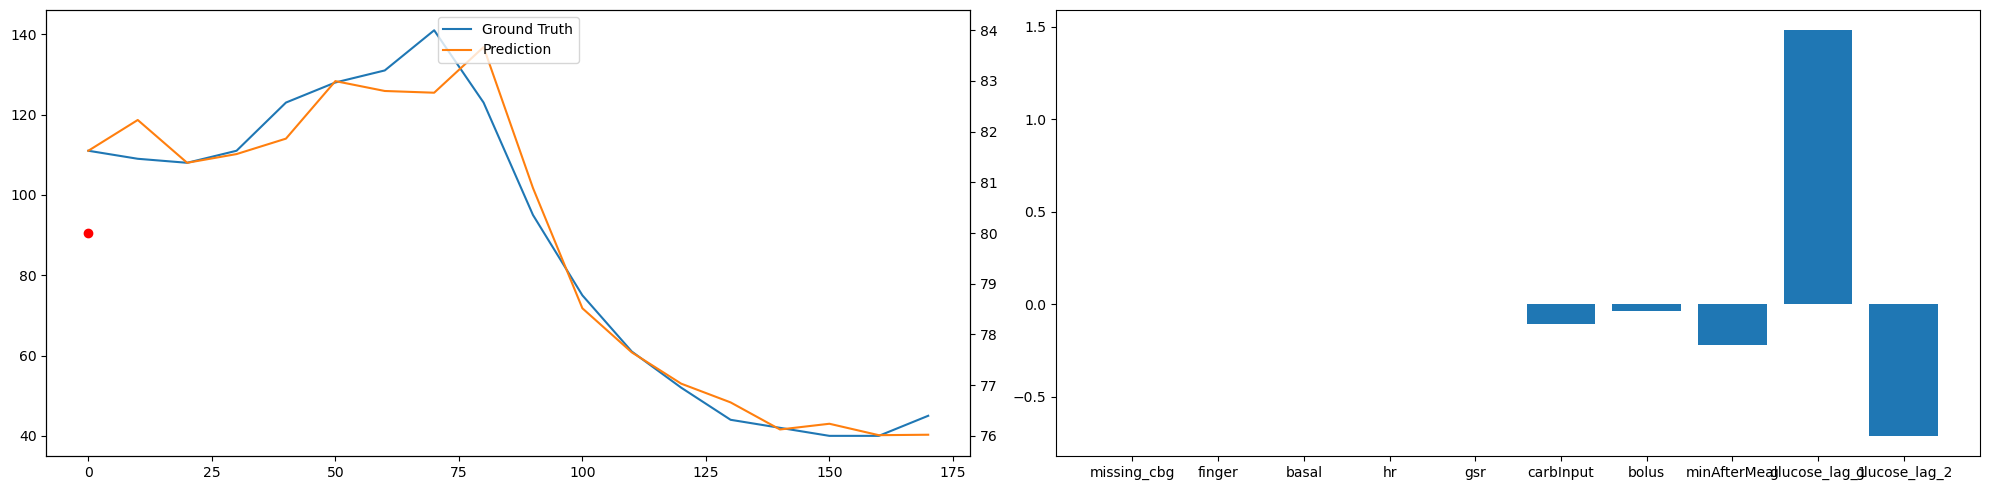

<Figure size 640x480 with 0 Axes>

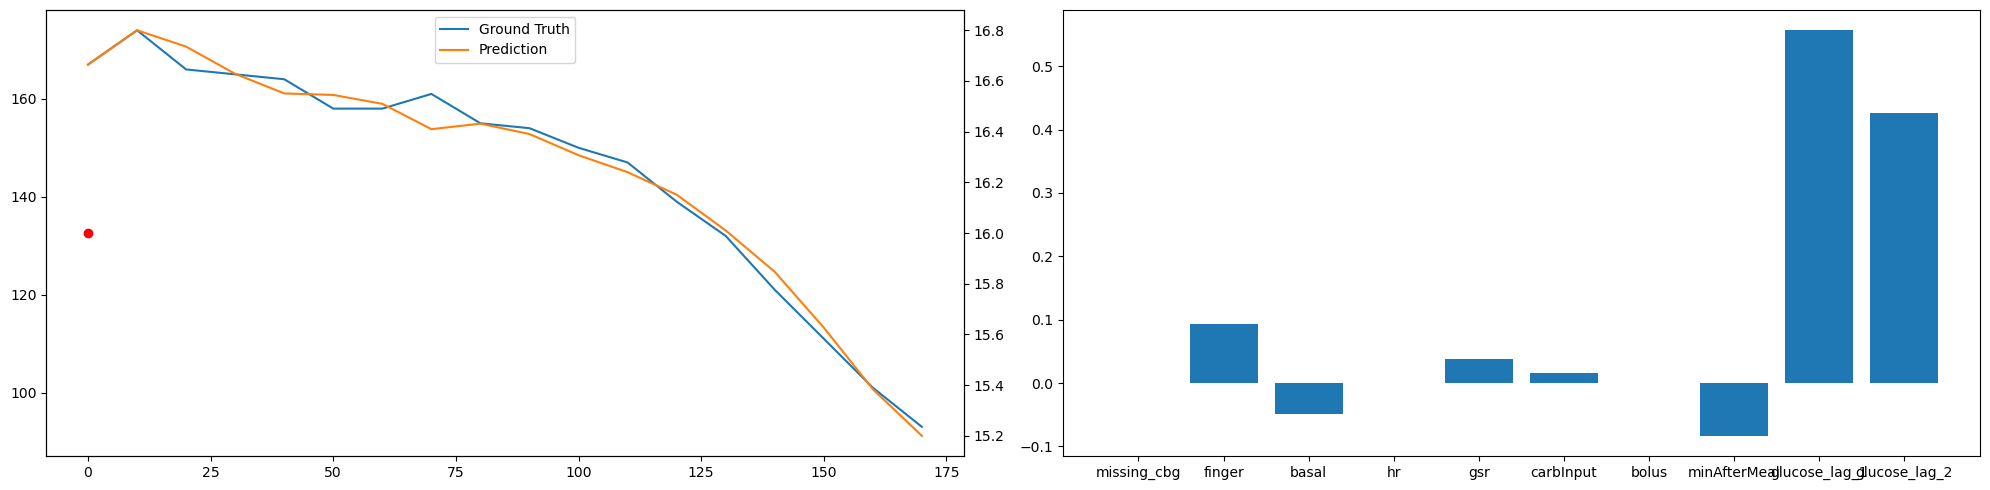

<Figure size 640x480 with 0 Axes>

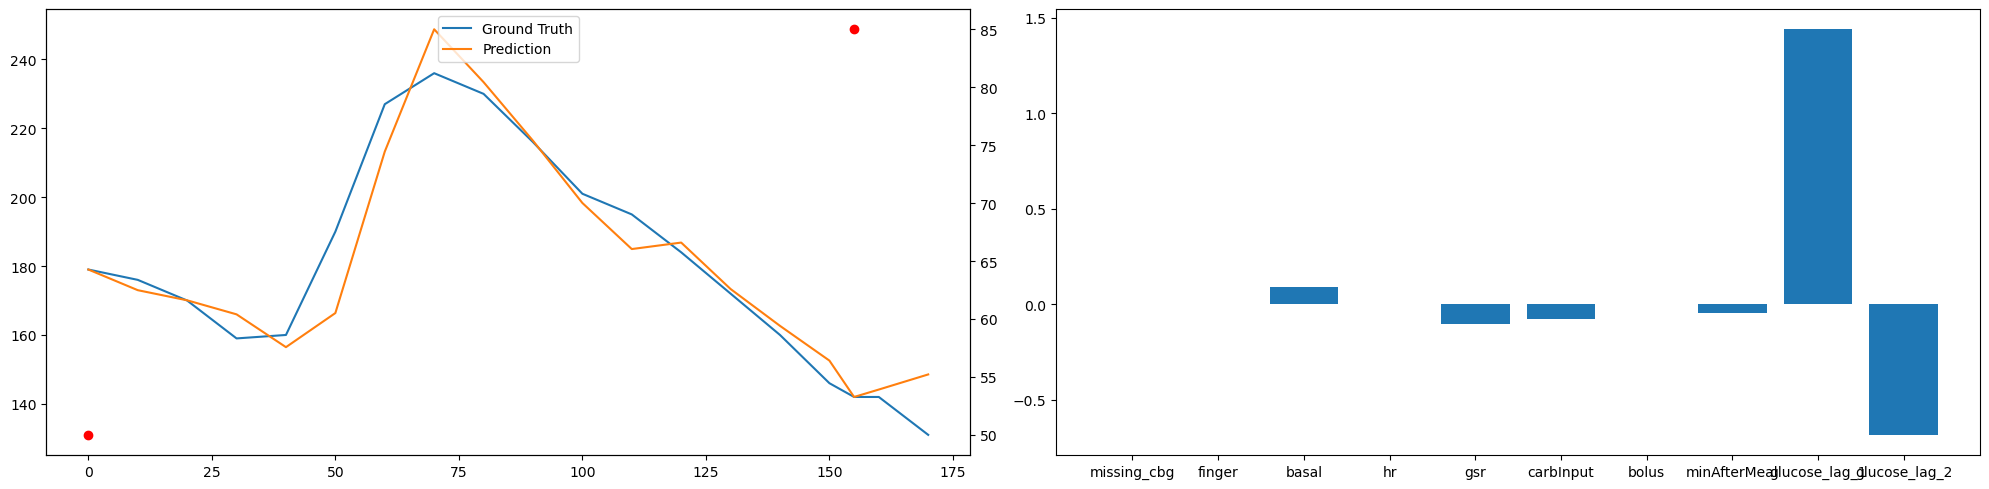

<Figure size 640x480 with 0 Axes>

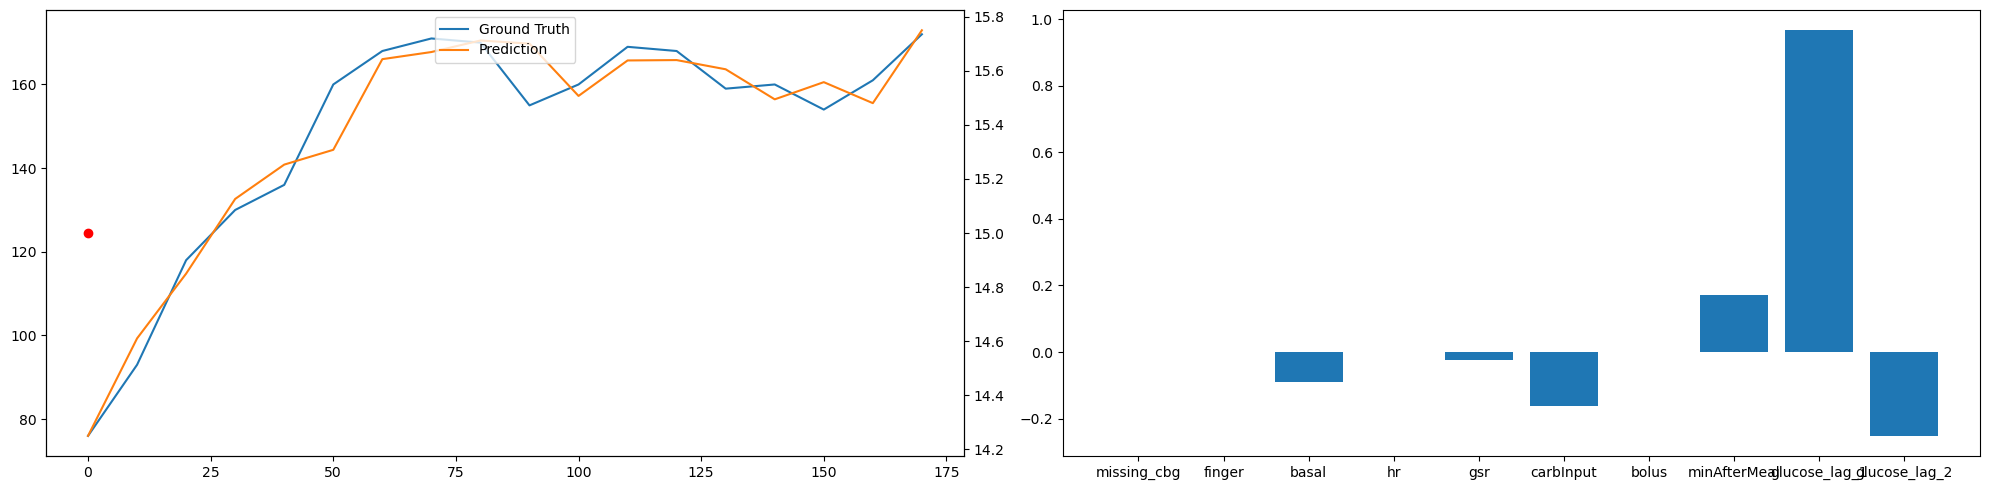

<Figure size 640x480 with 0 Axes>

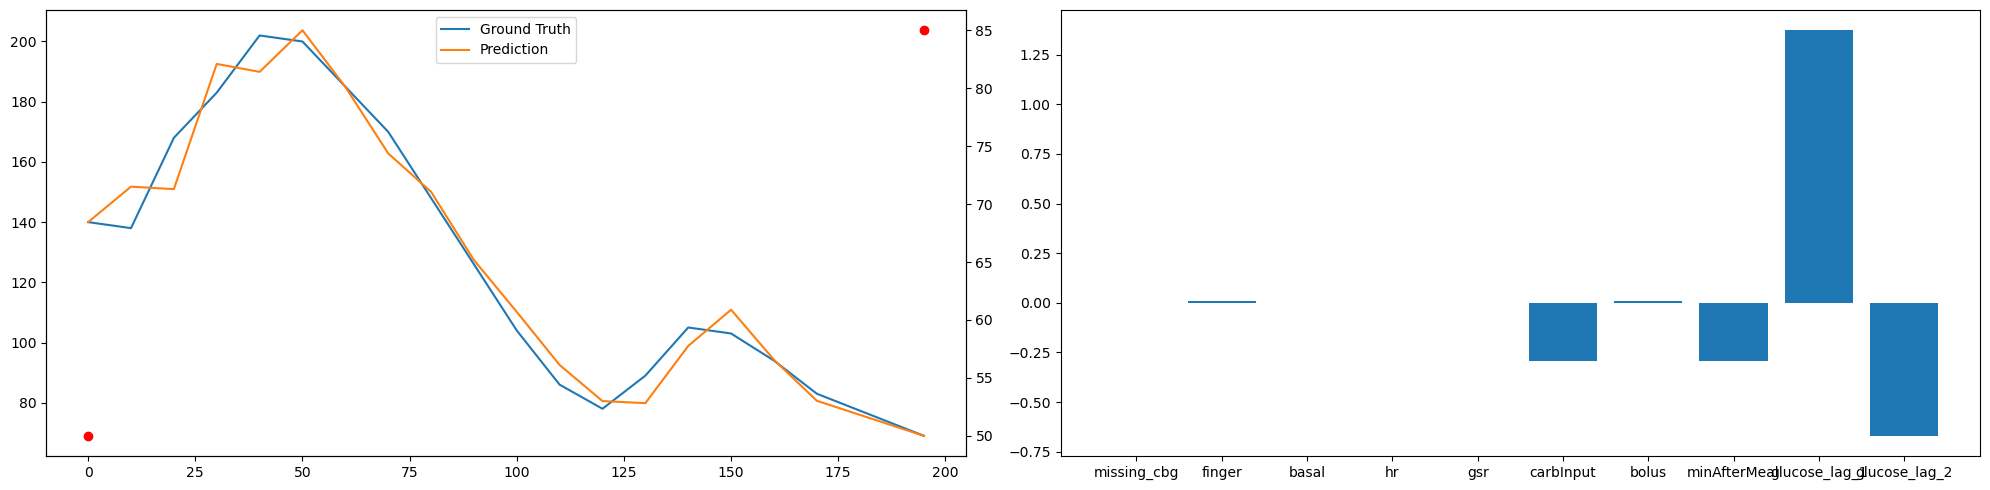

<Figure size 640x480 with 0 Axes>

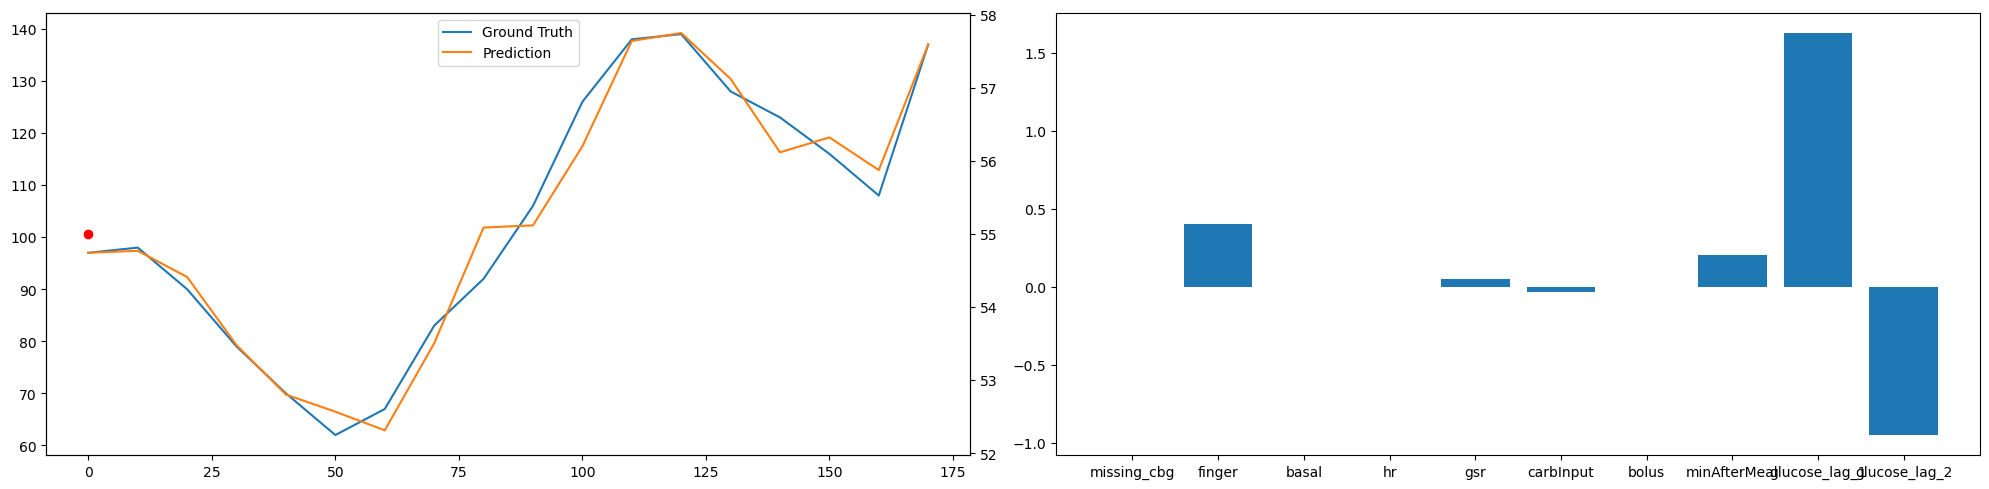

<Figure size 640x480 with 0 Axes>

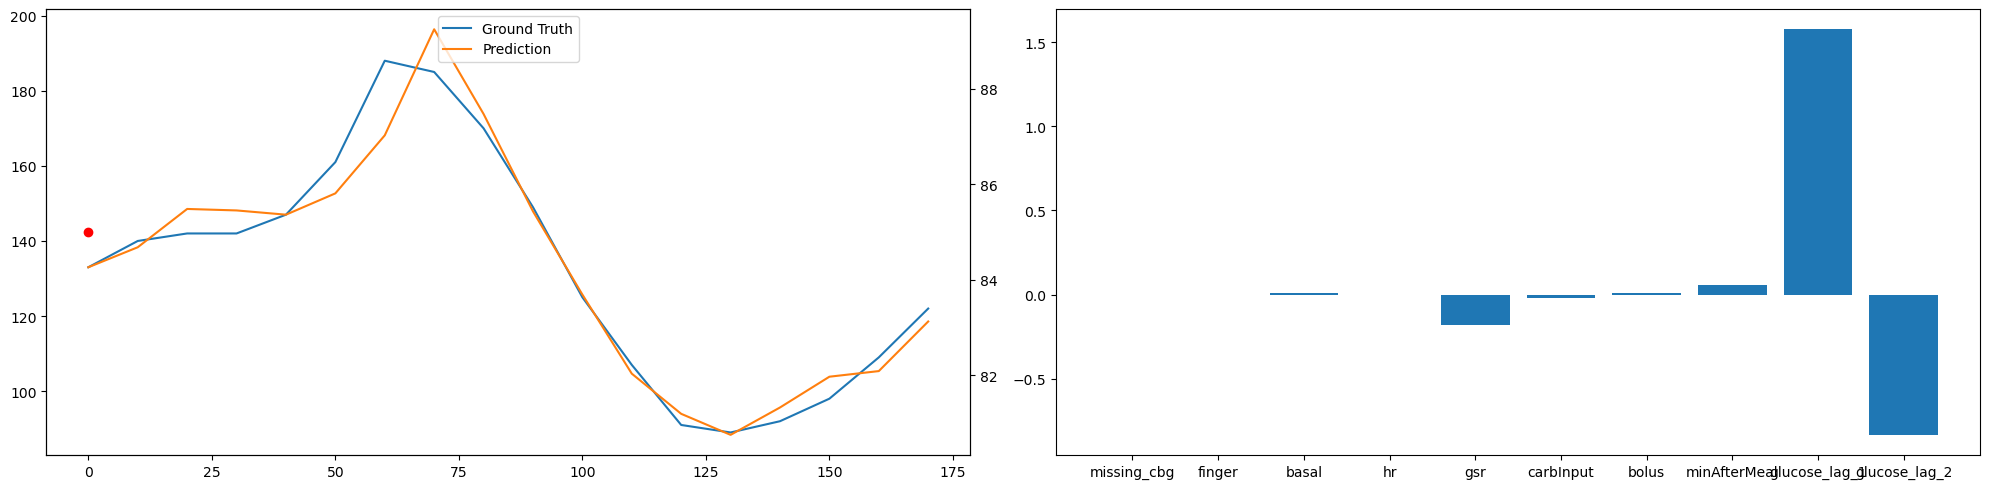

<Figure size 640x480 with 0 Axes>

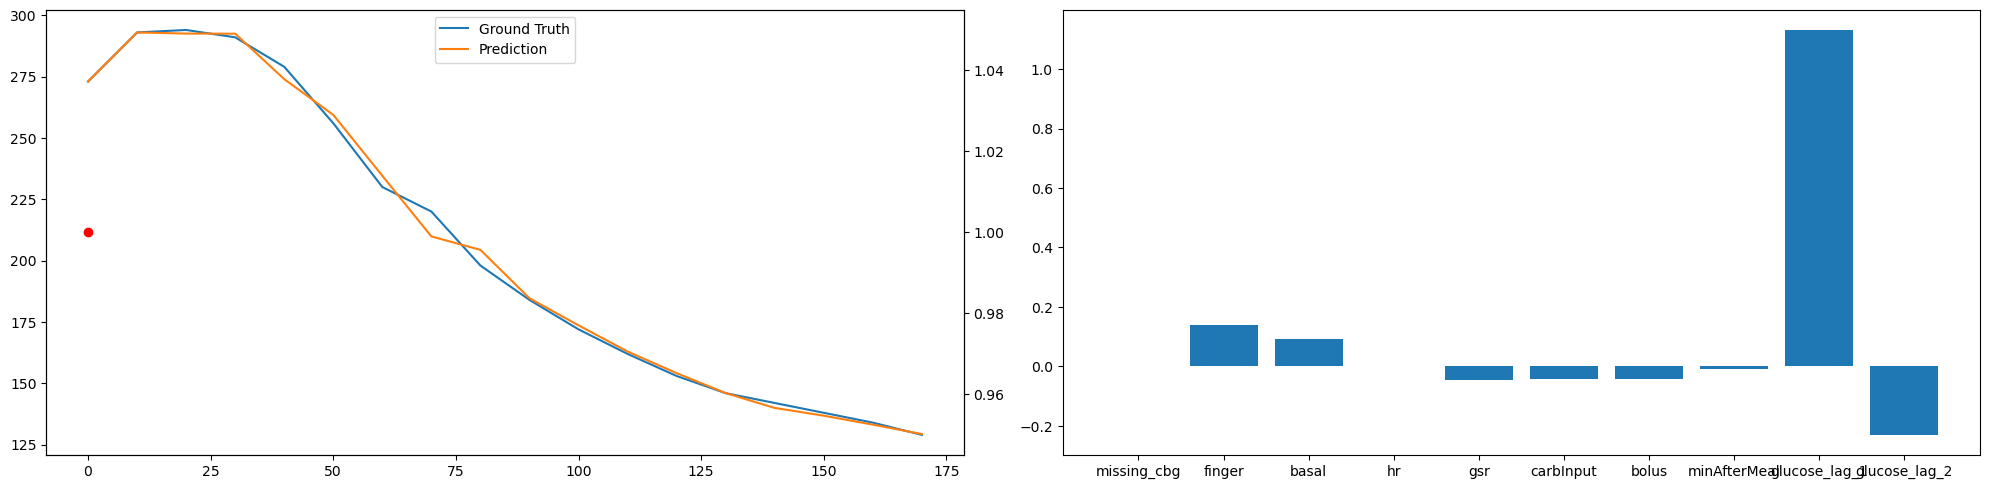

<Figure size 640x480 with 0 Axes>

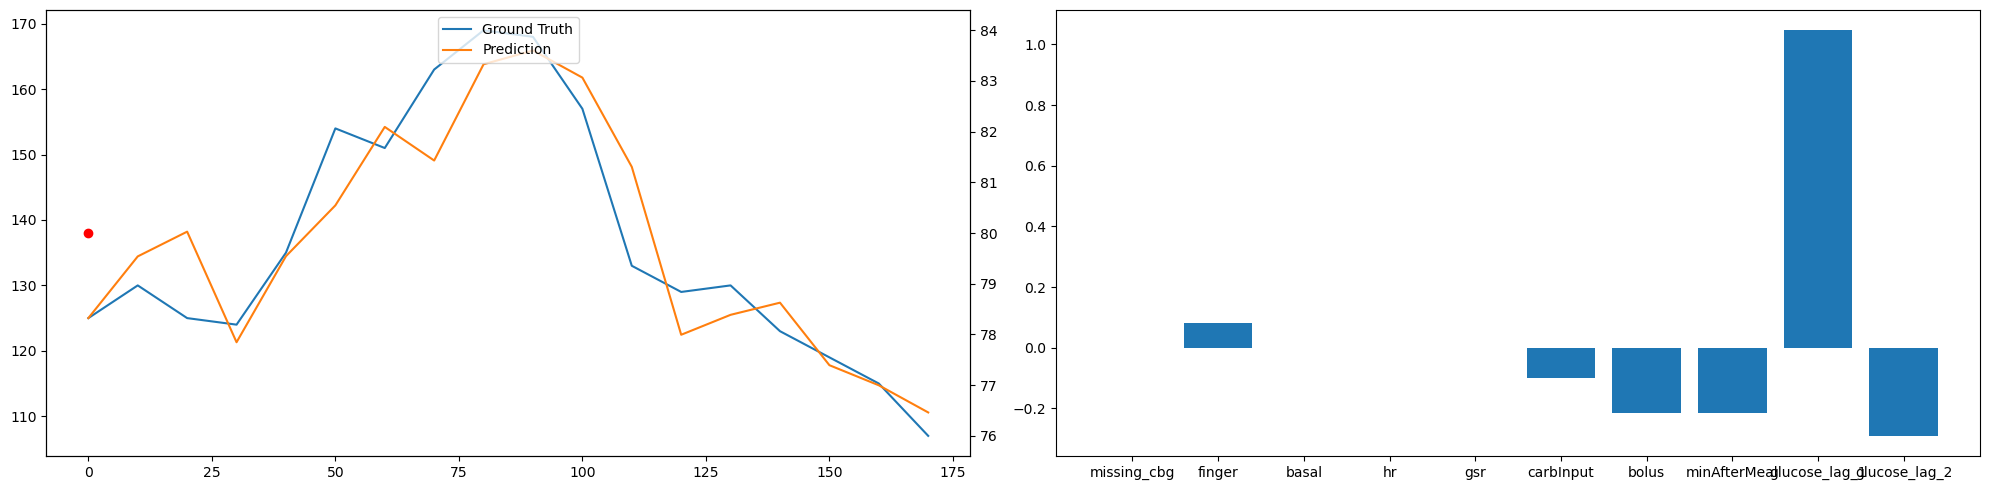

<Figure size 640x480 with 0 Axes>

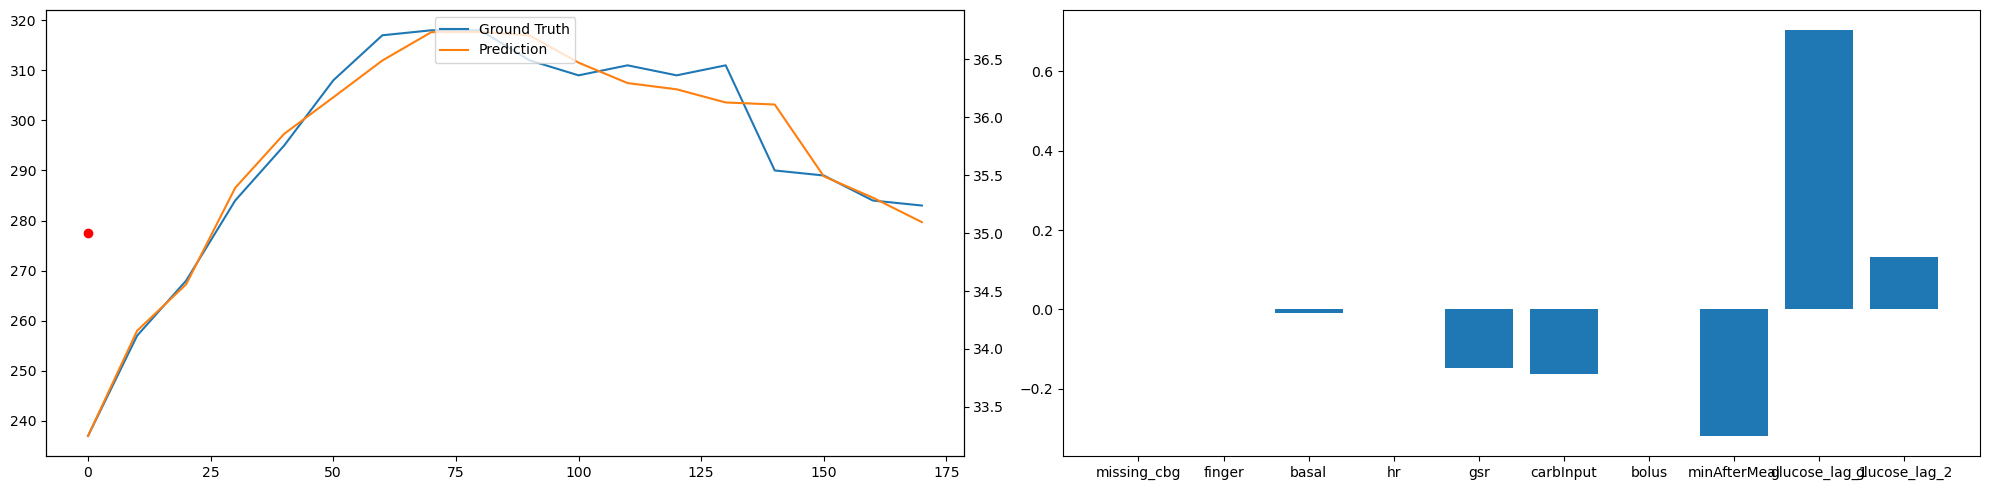

<Figure size 640x480 with 0 Axes>

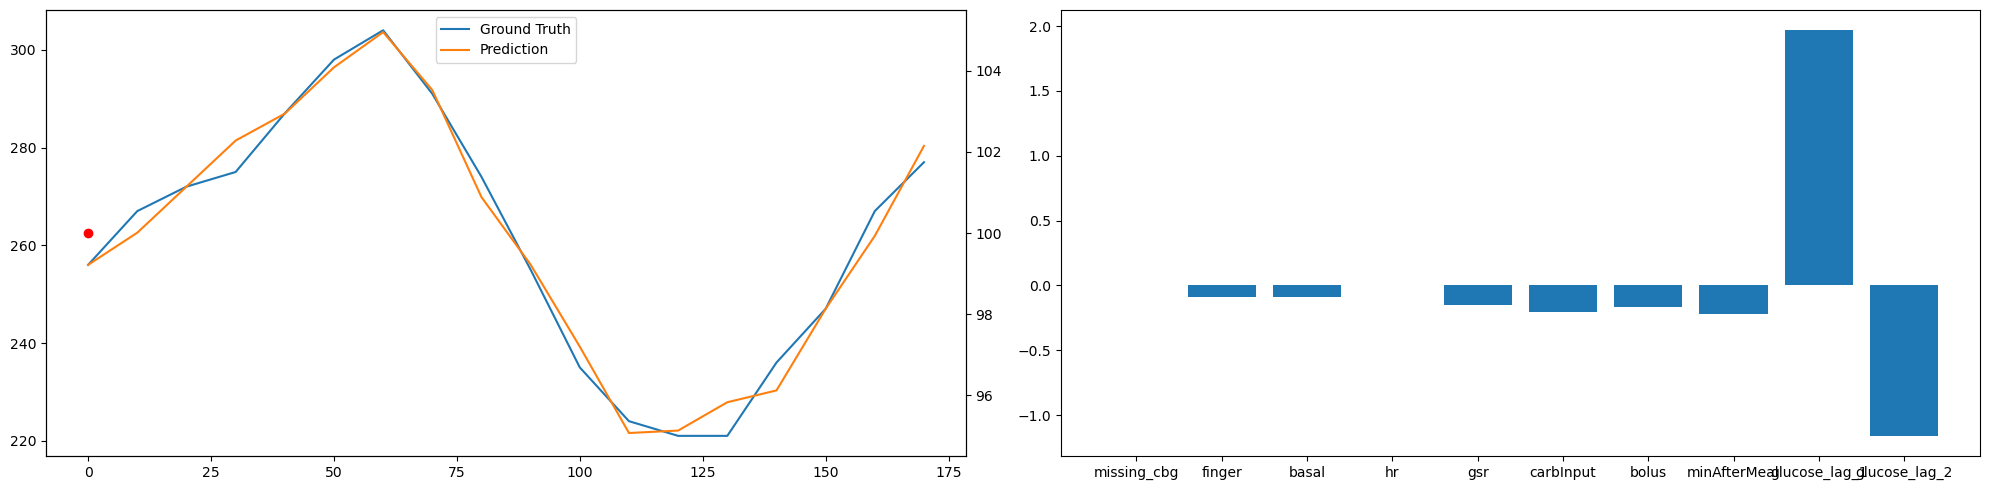

<Figure size 640x480 with 0 Axes>

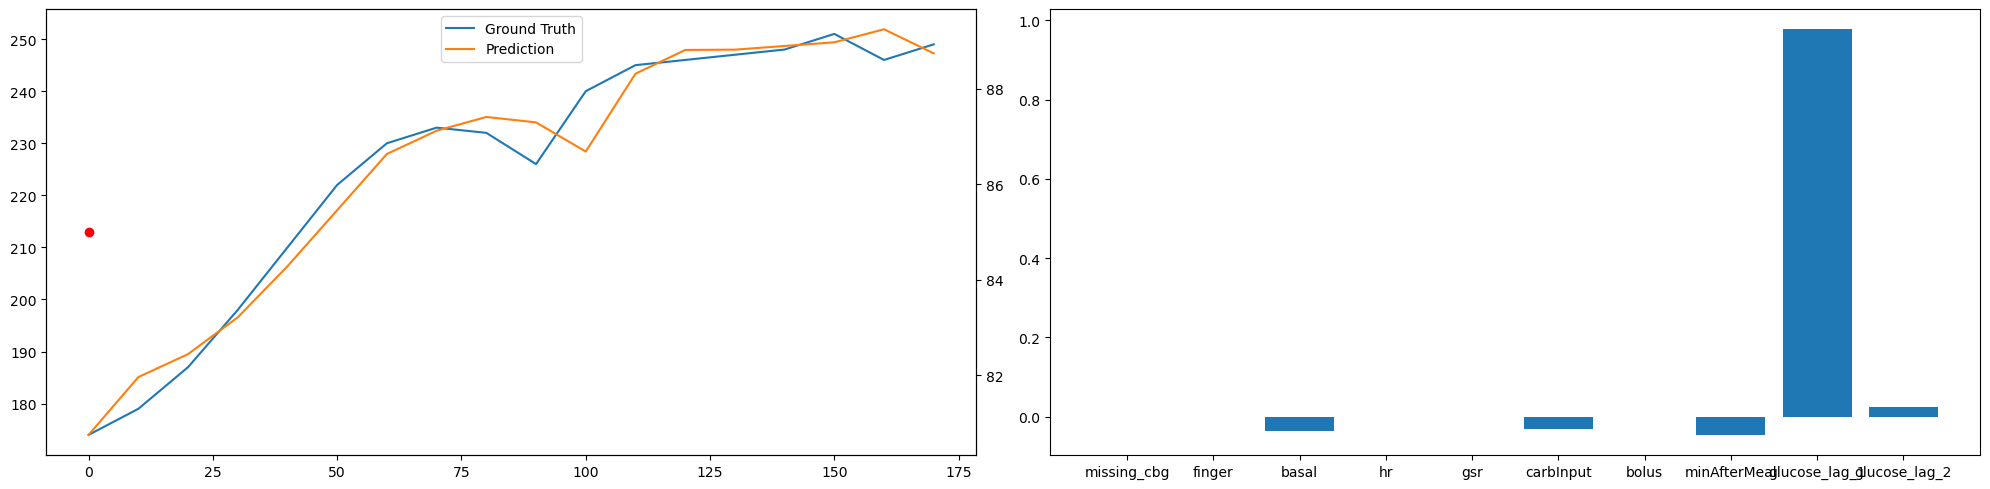

<Figure size 640x480 with 0 Axes>

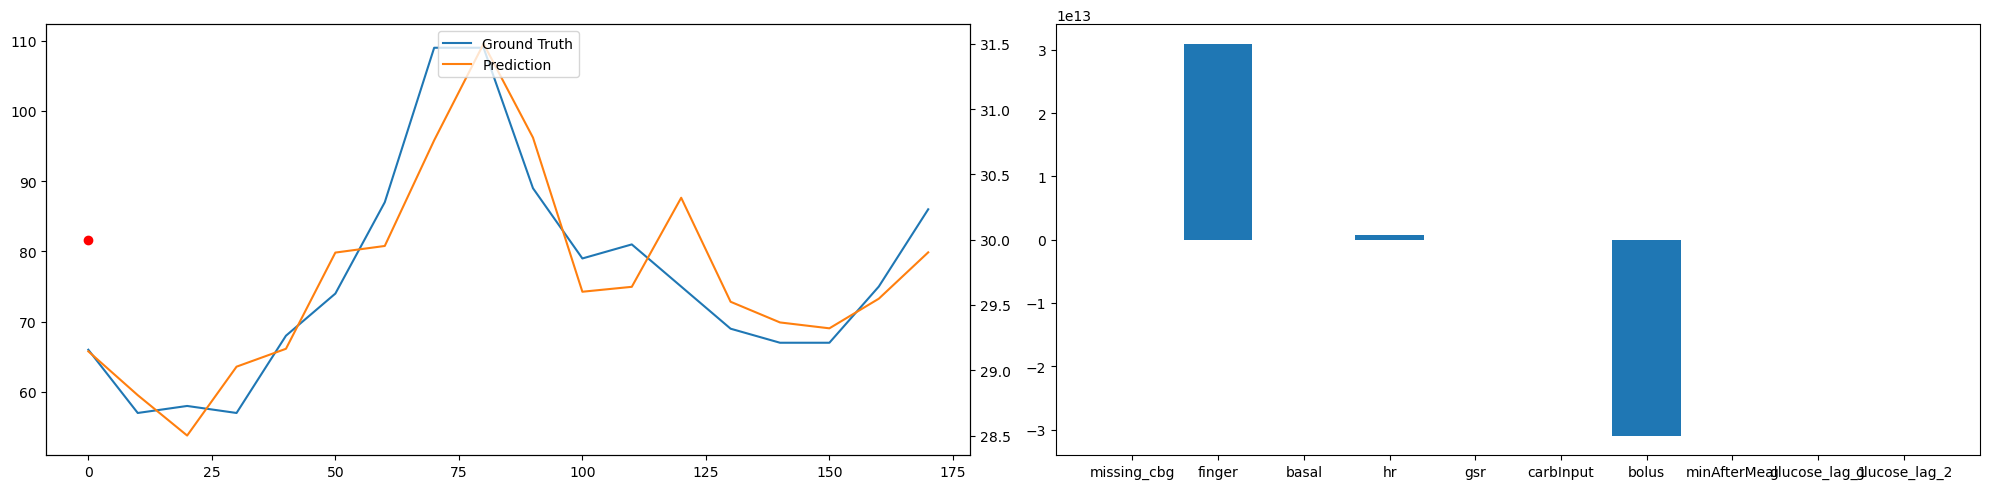

<Figure size 640x480 with 0 Axes>

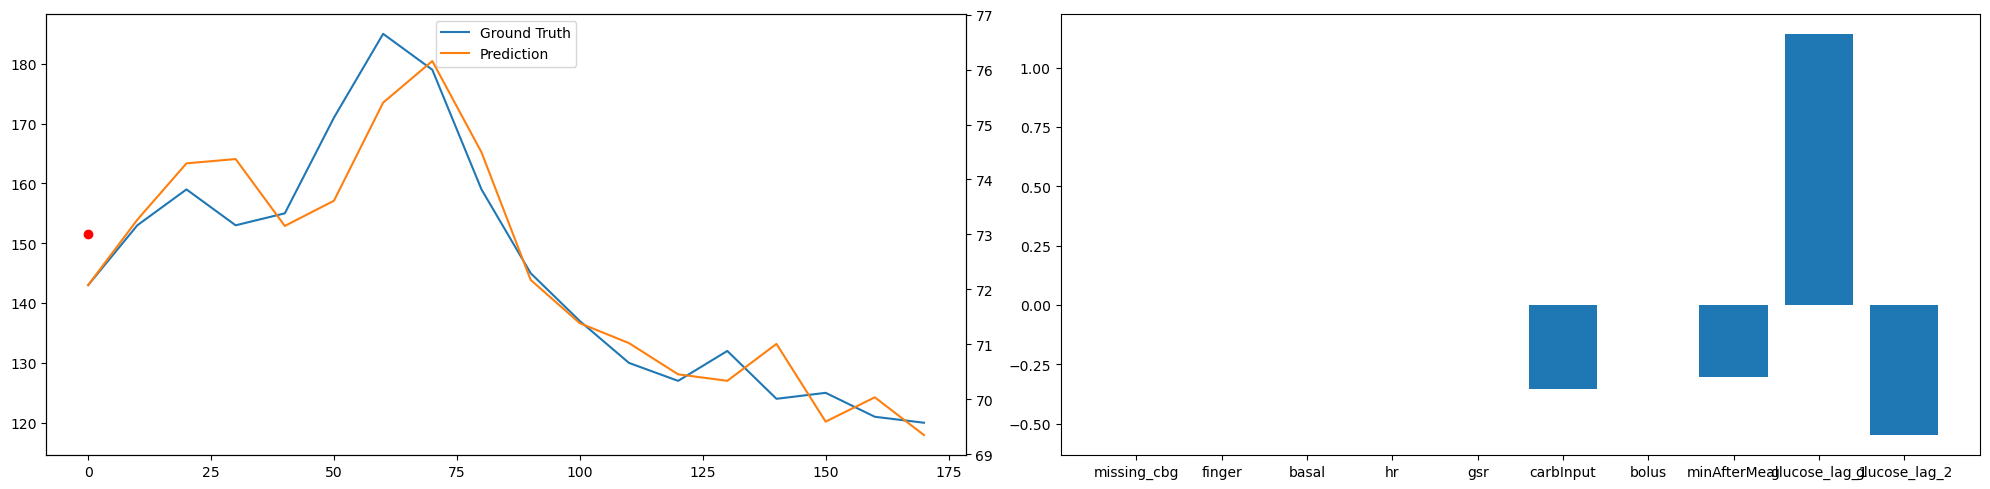

<Figure size 640x480 with 0 Axes>

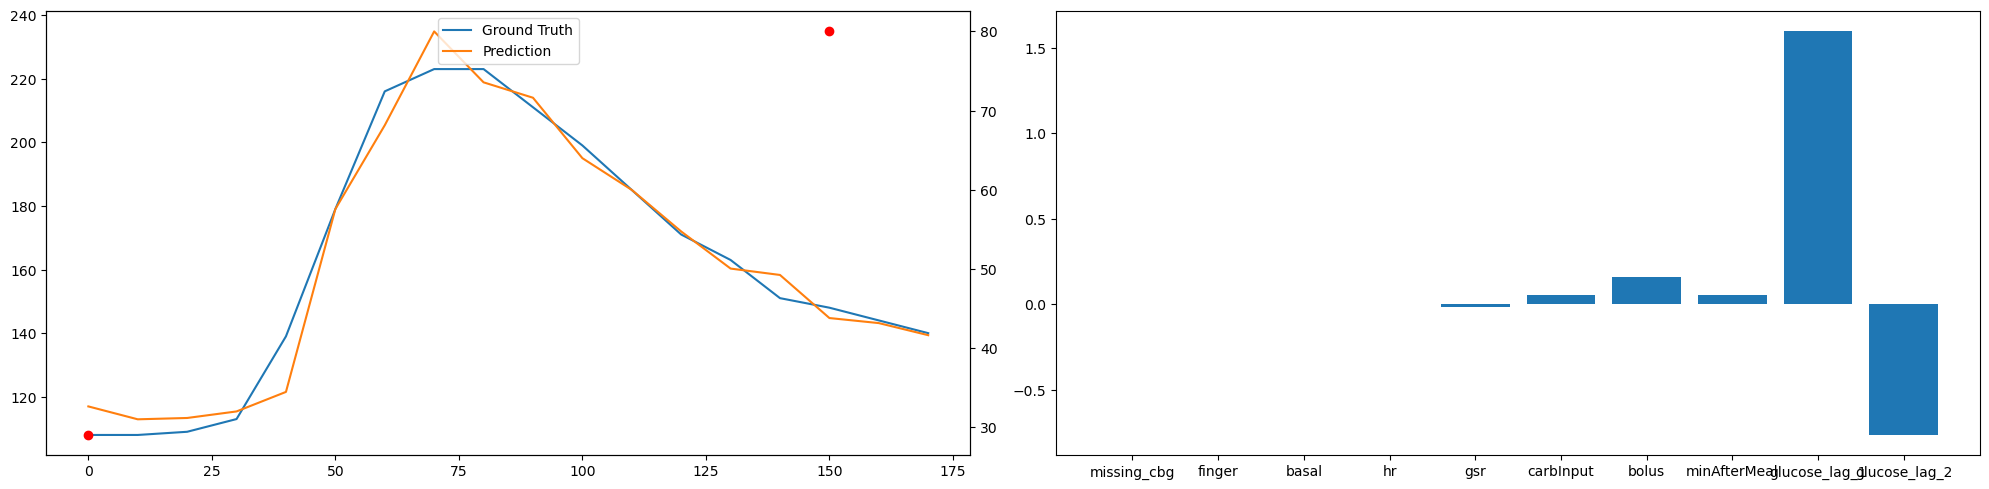

<Figure size 640x480 with 0 Axes>

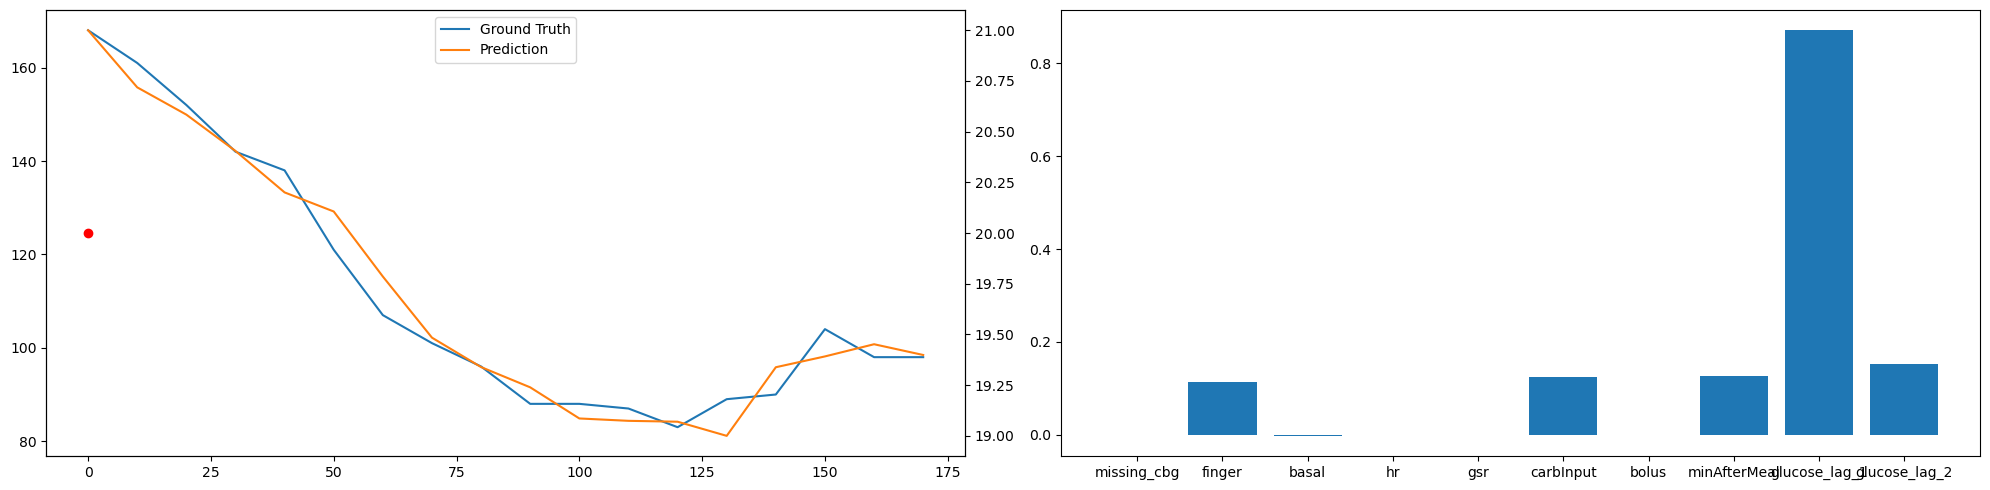

<Figure size 640x480 with 0 Axes>

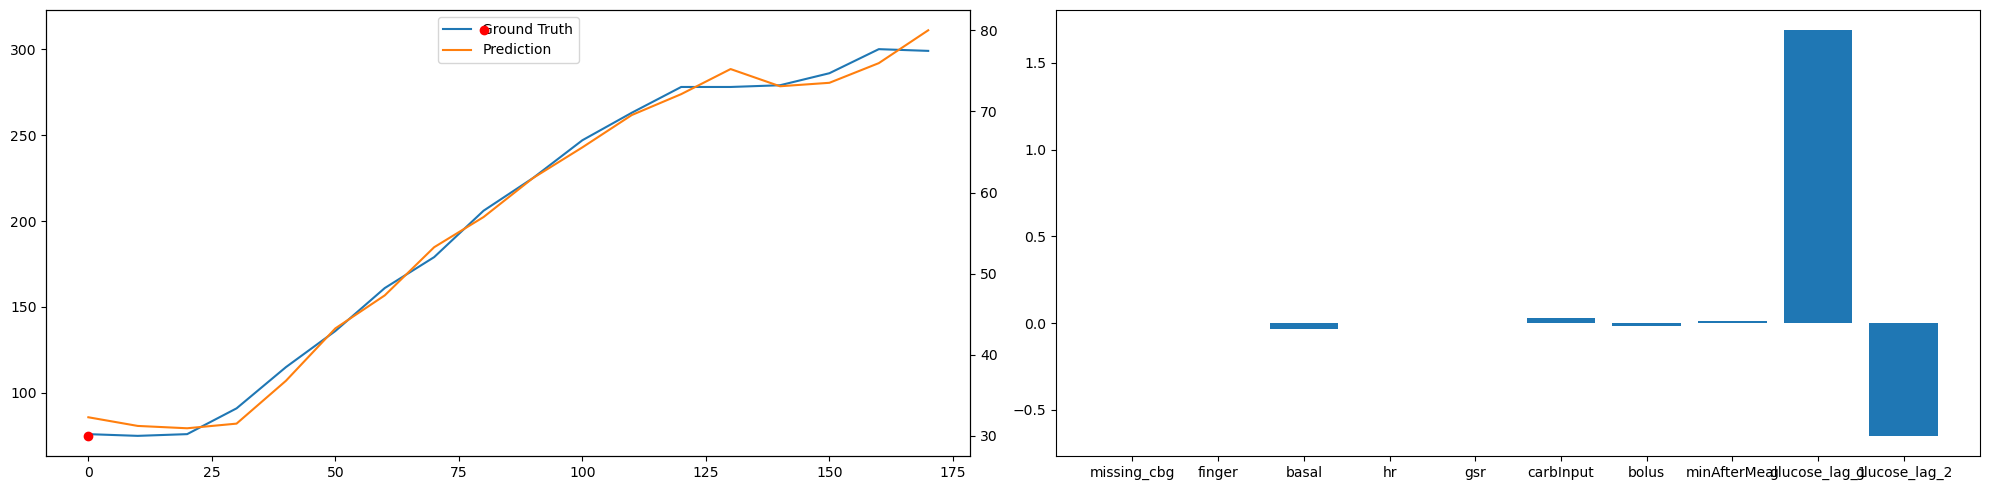

<Figure size 640x480 with 0 Axes>

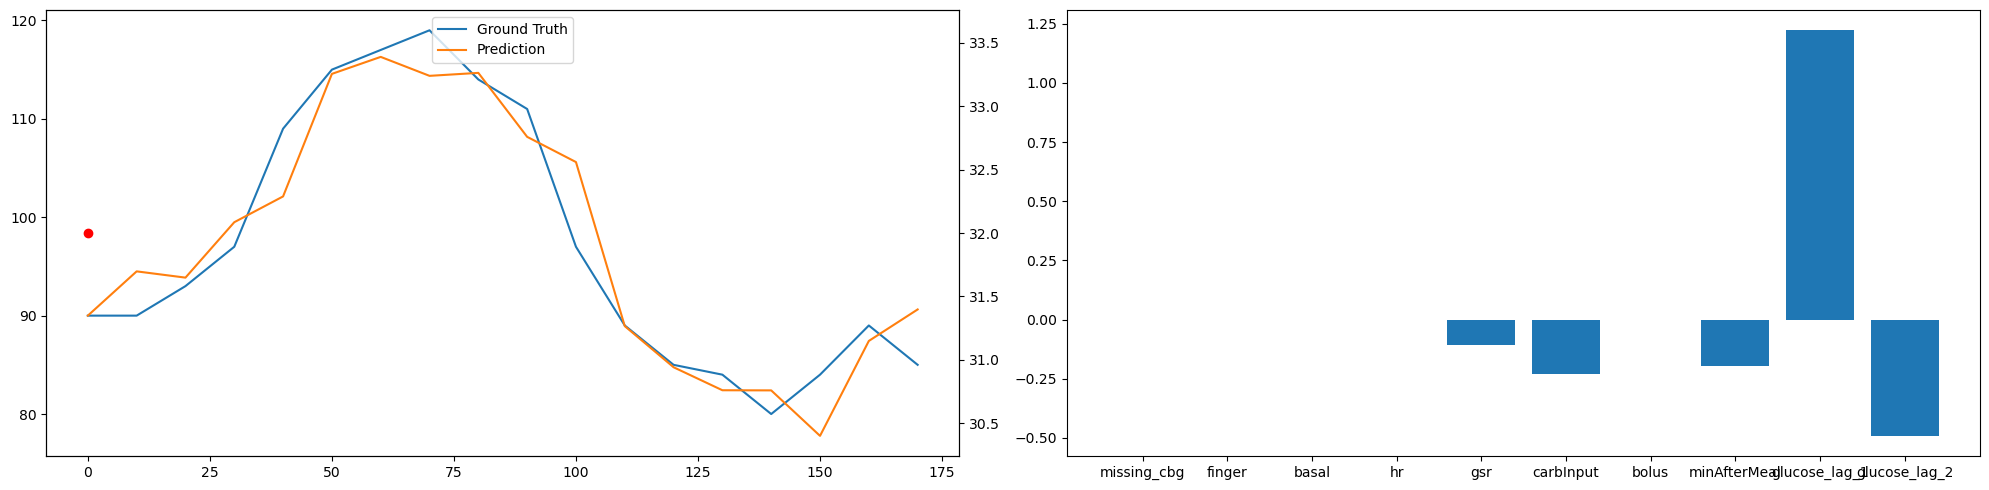

In [9]:
coef = []
model = LinearRegression()
for data in X_train:
    plt.figure()
    coef.append(train_model(data, model))

In [39]:
## Create ensemble linear regression model
totCoef = 0
for x in coef:
    totCoef += x

averageCoef = totCoef / len(coef)

/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_44331/2978319518.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

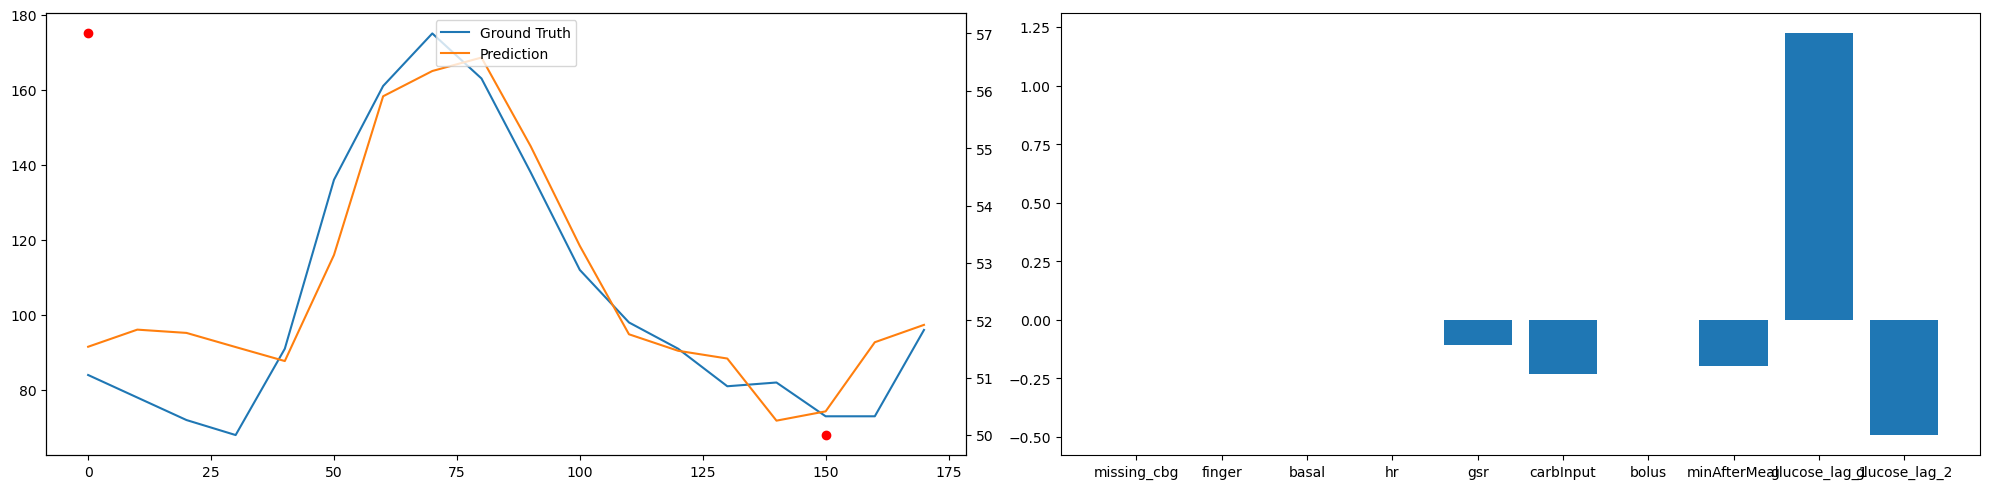

<Figure size 640x480 with 0 Axes>

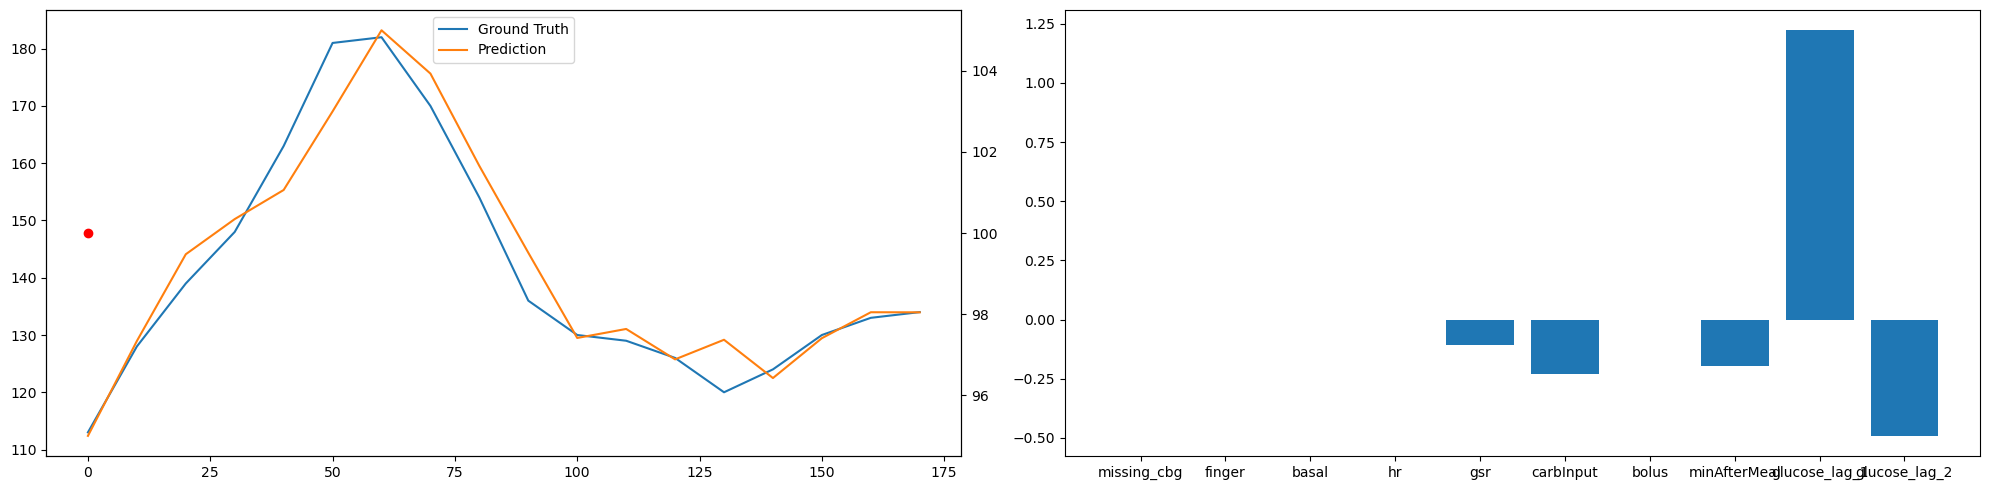

<Figure size 640x480 with 0 Axes>

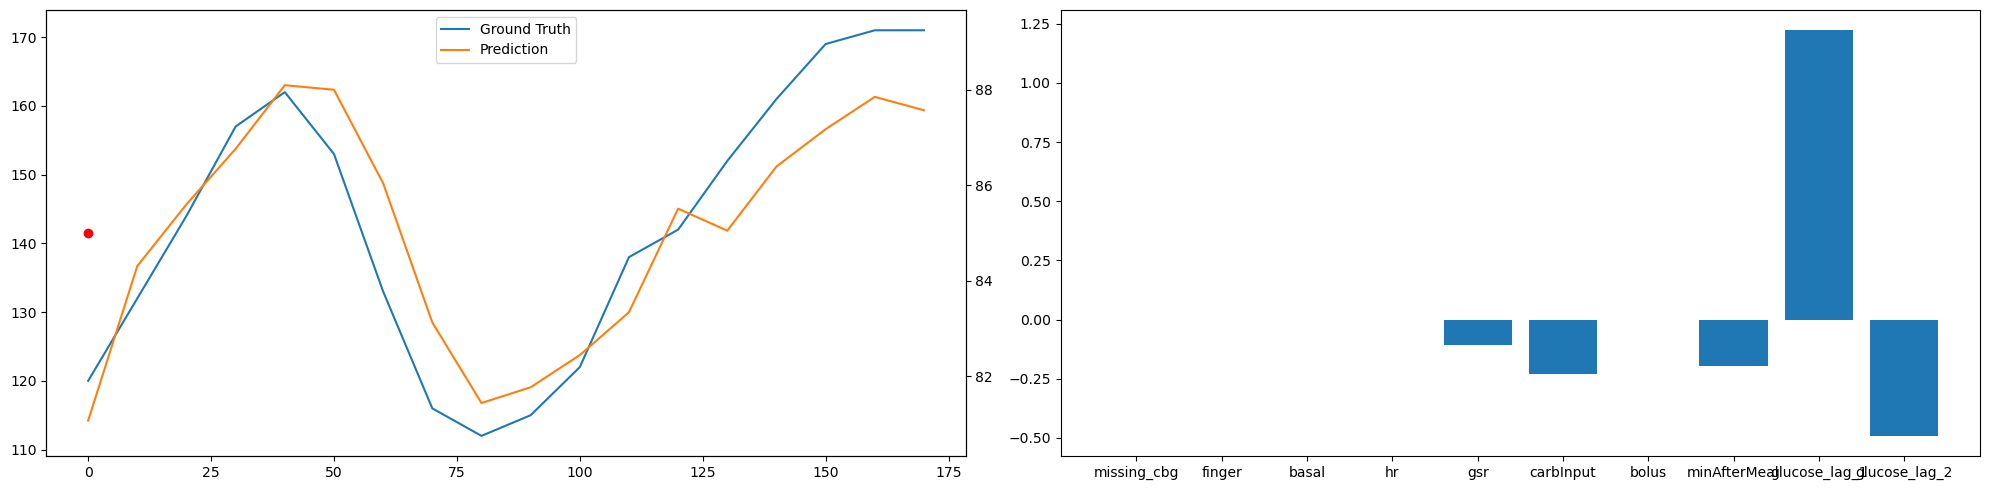

<Figure size 640x480 with 0 Axes>

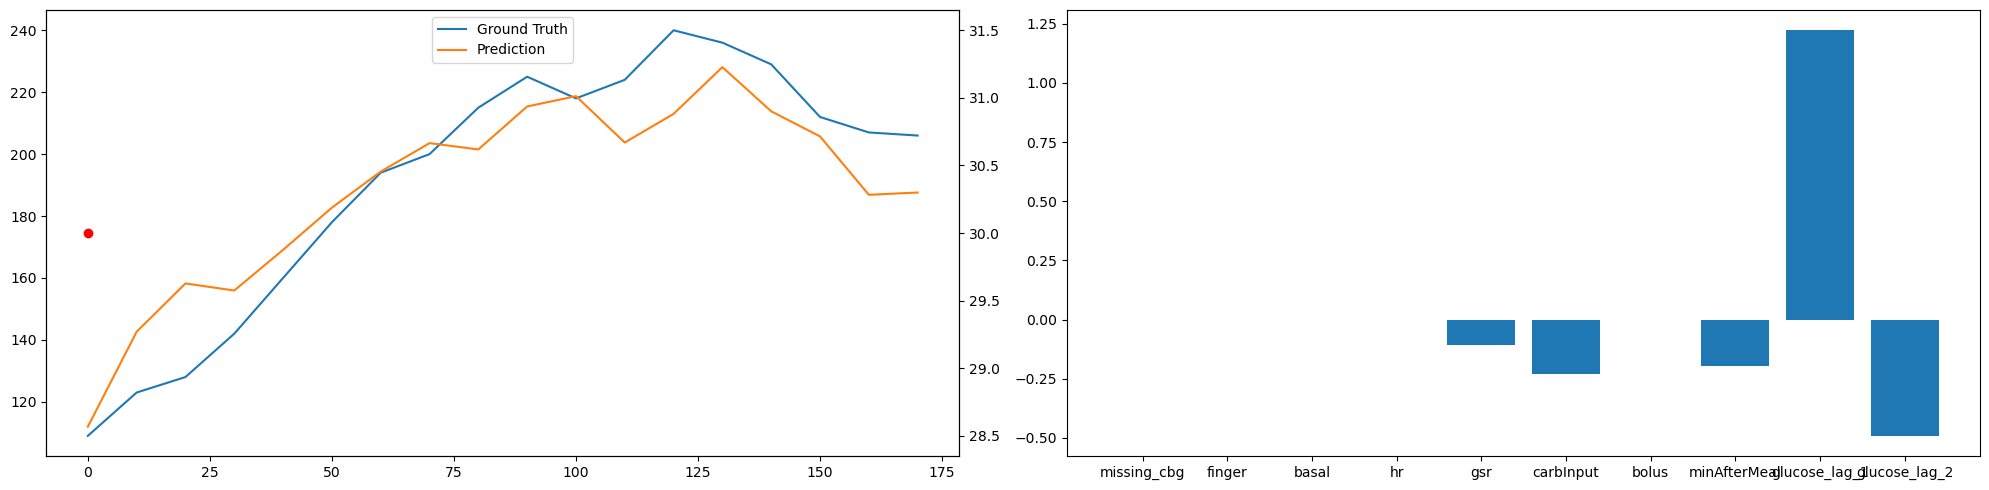

<Figure size 640x480 with 0 Axes>

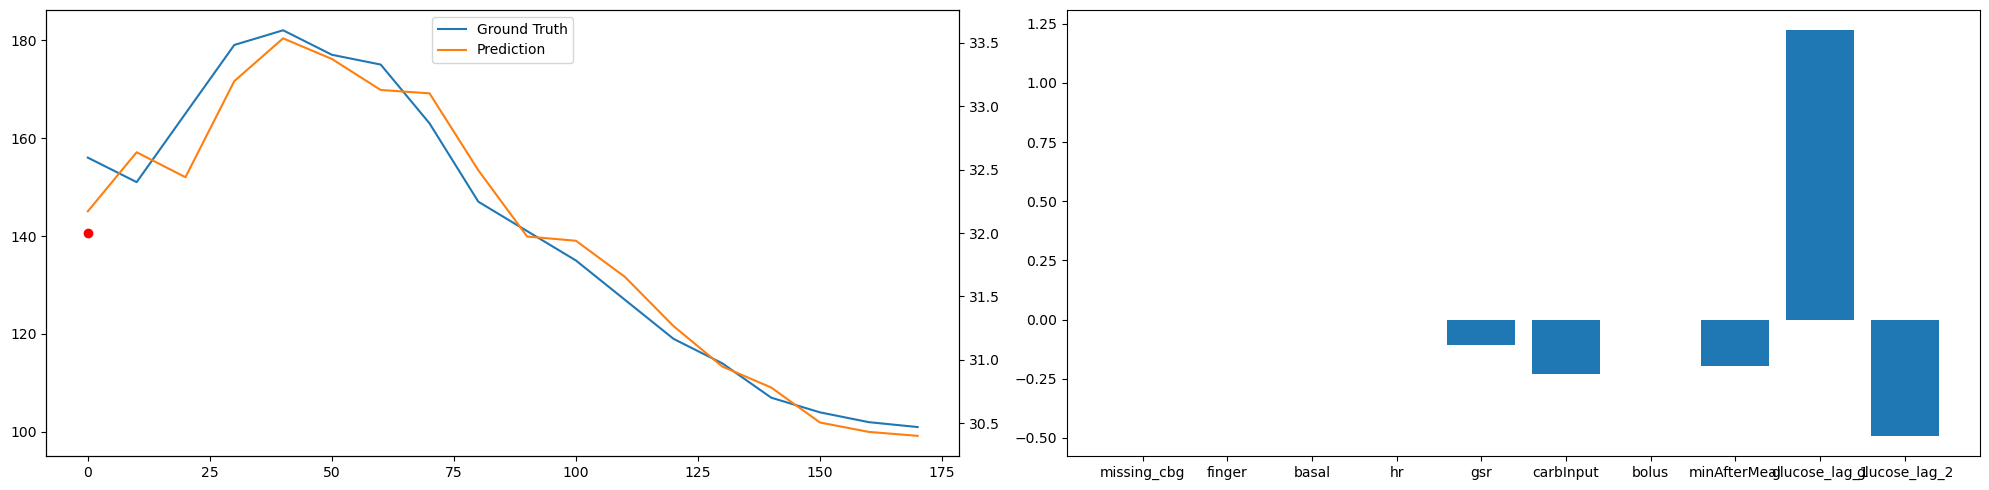

<Figure size 640x480 with 0 Axes>

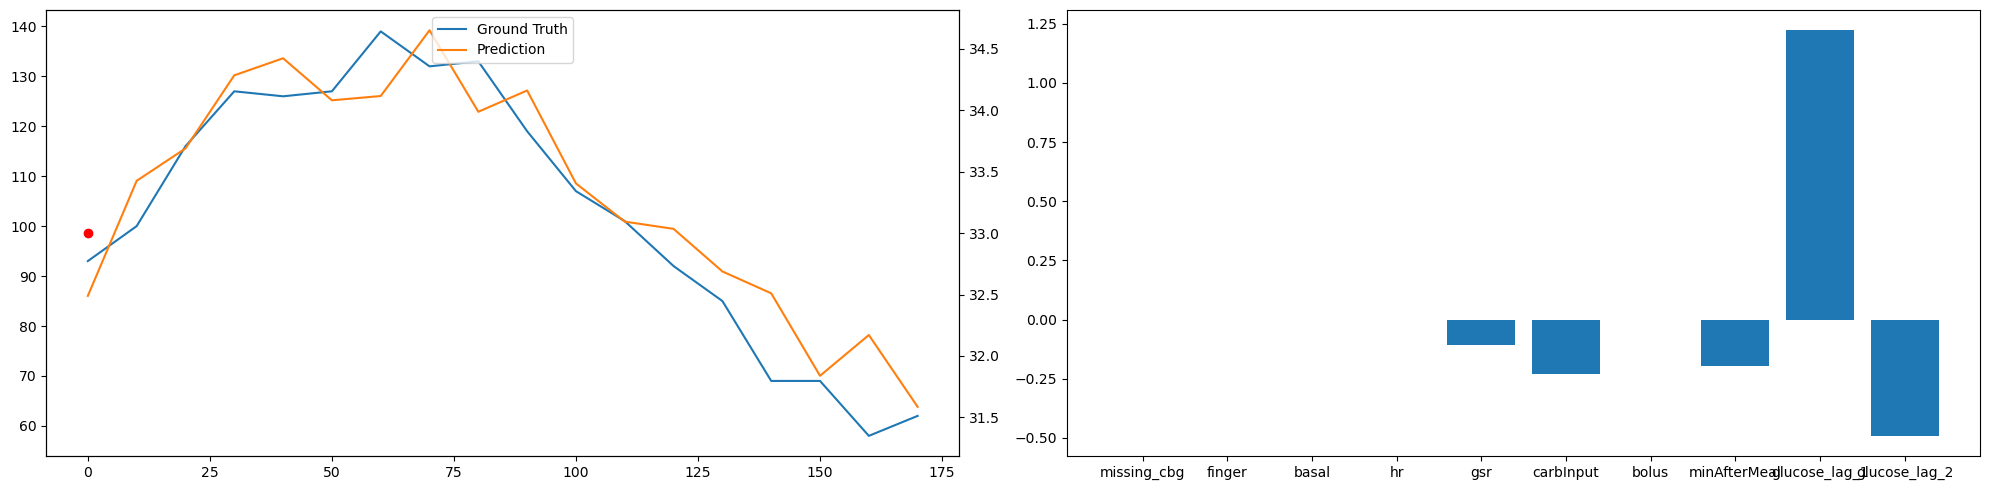

<Figure size 640x480 with 0 Axes>

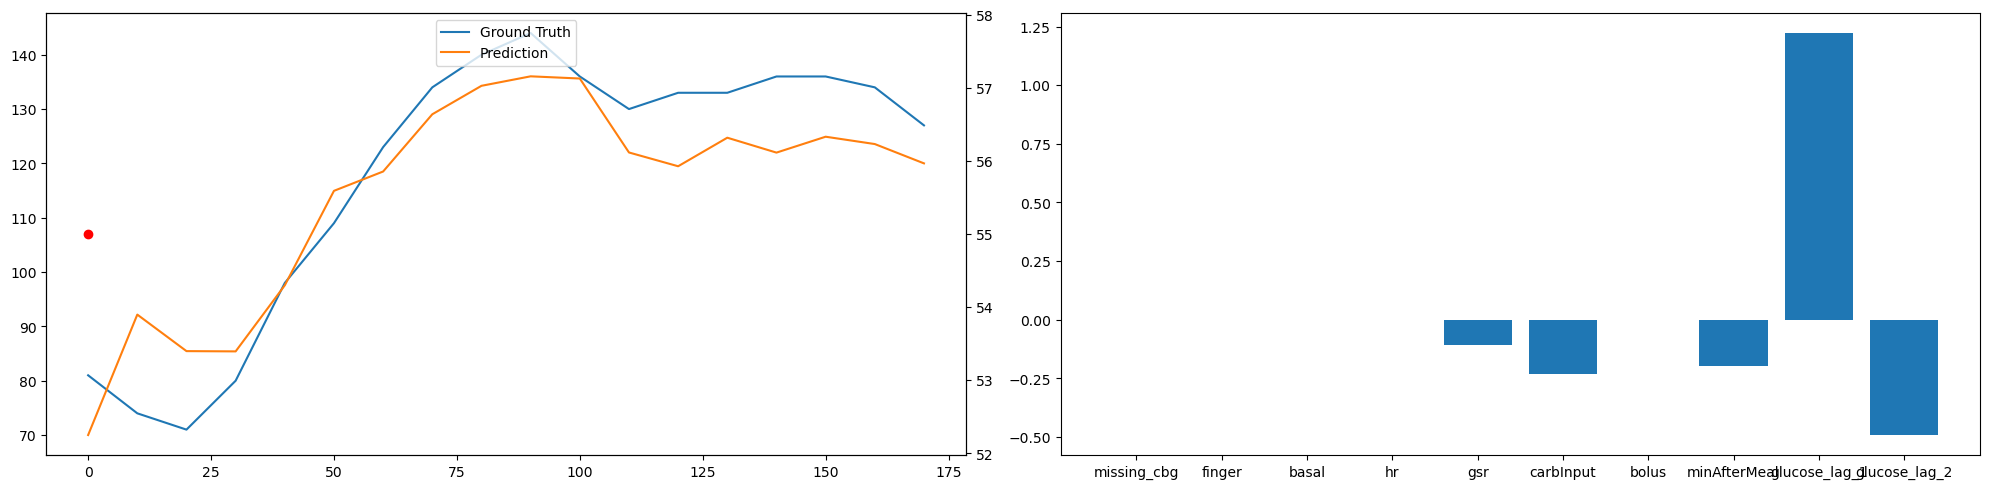

<Figure size 640x480 with 0 Axes>

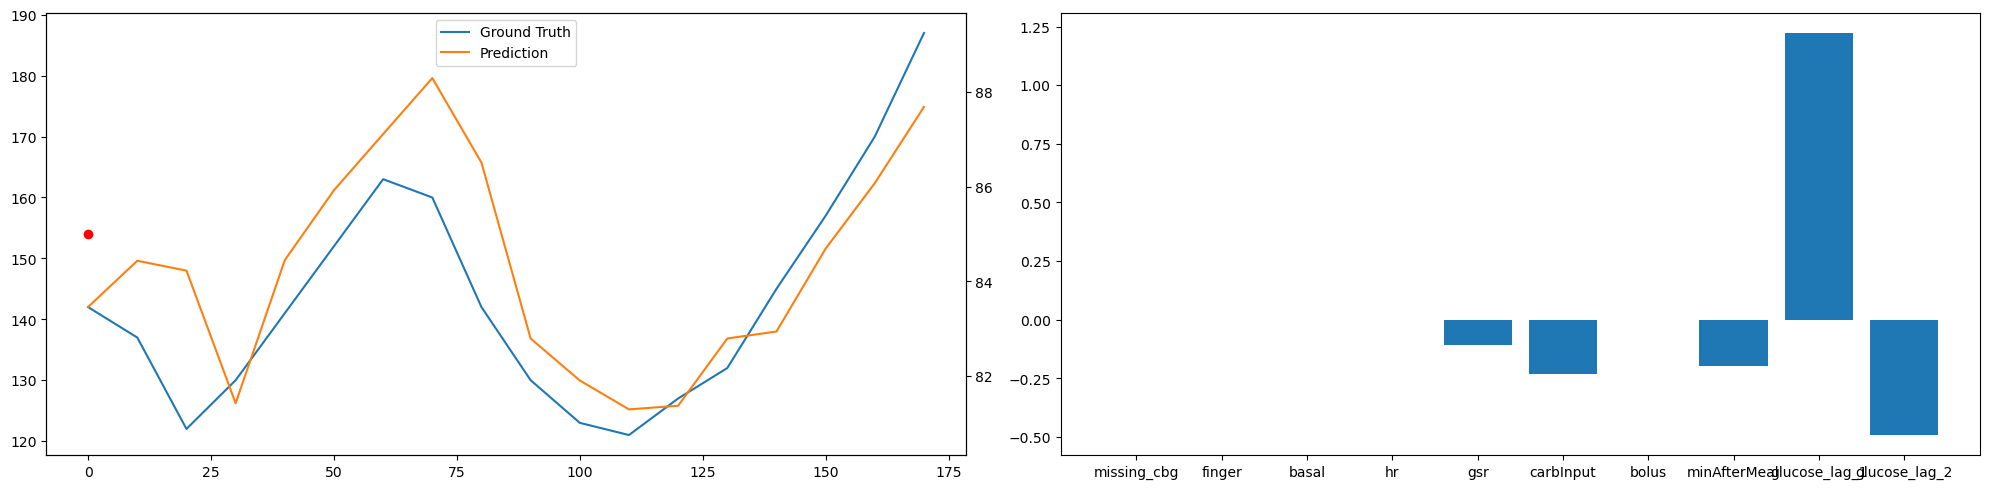

<Figure size 640x480 with 0 Axes>

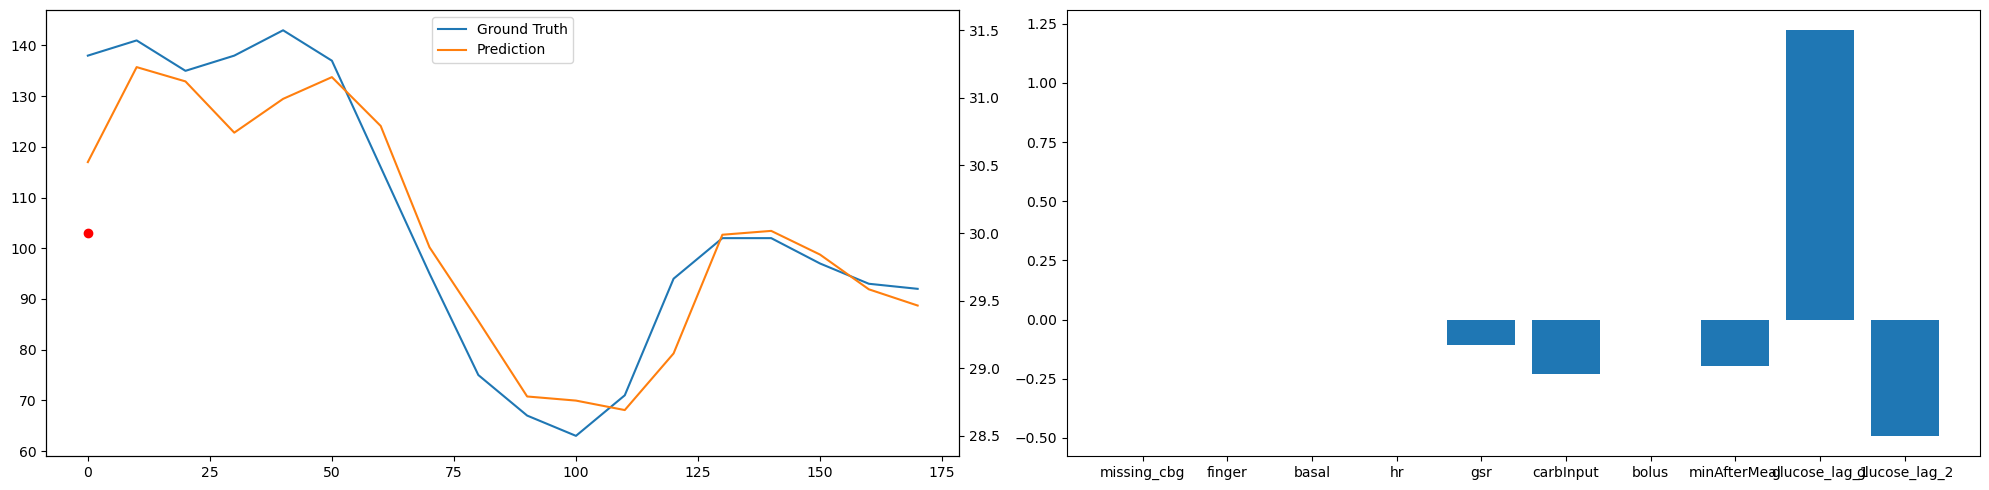

<Figure size 640x480 with 0 Axes>

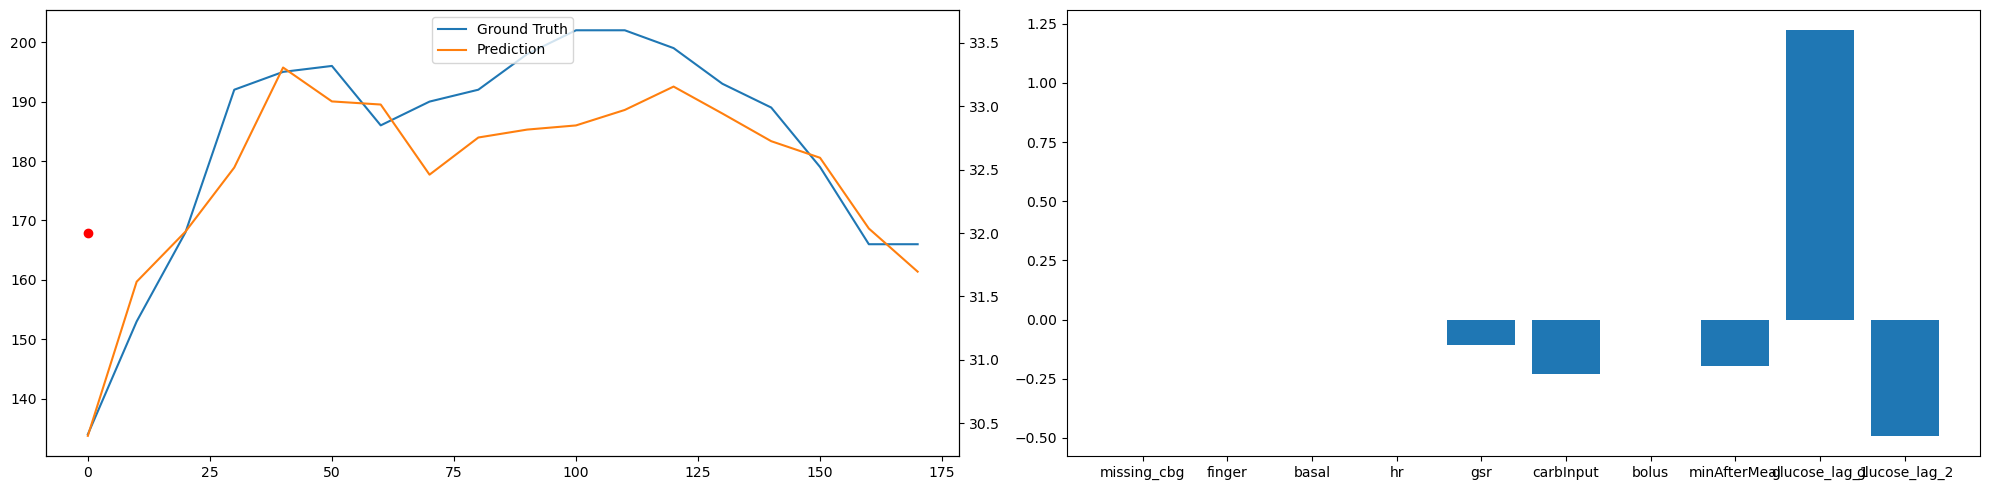

<Figure size 640x480 with 0 Axes>

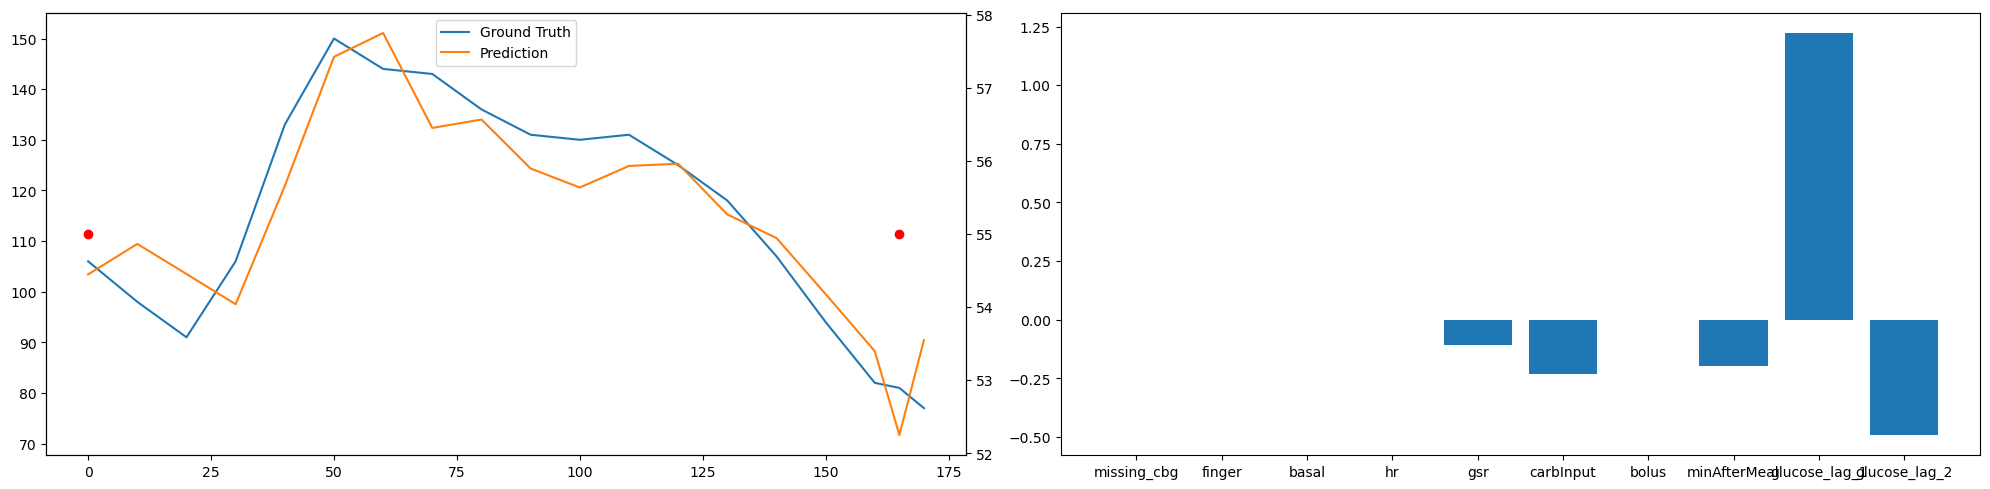

<Figure size 640x480 with 0 Axes>

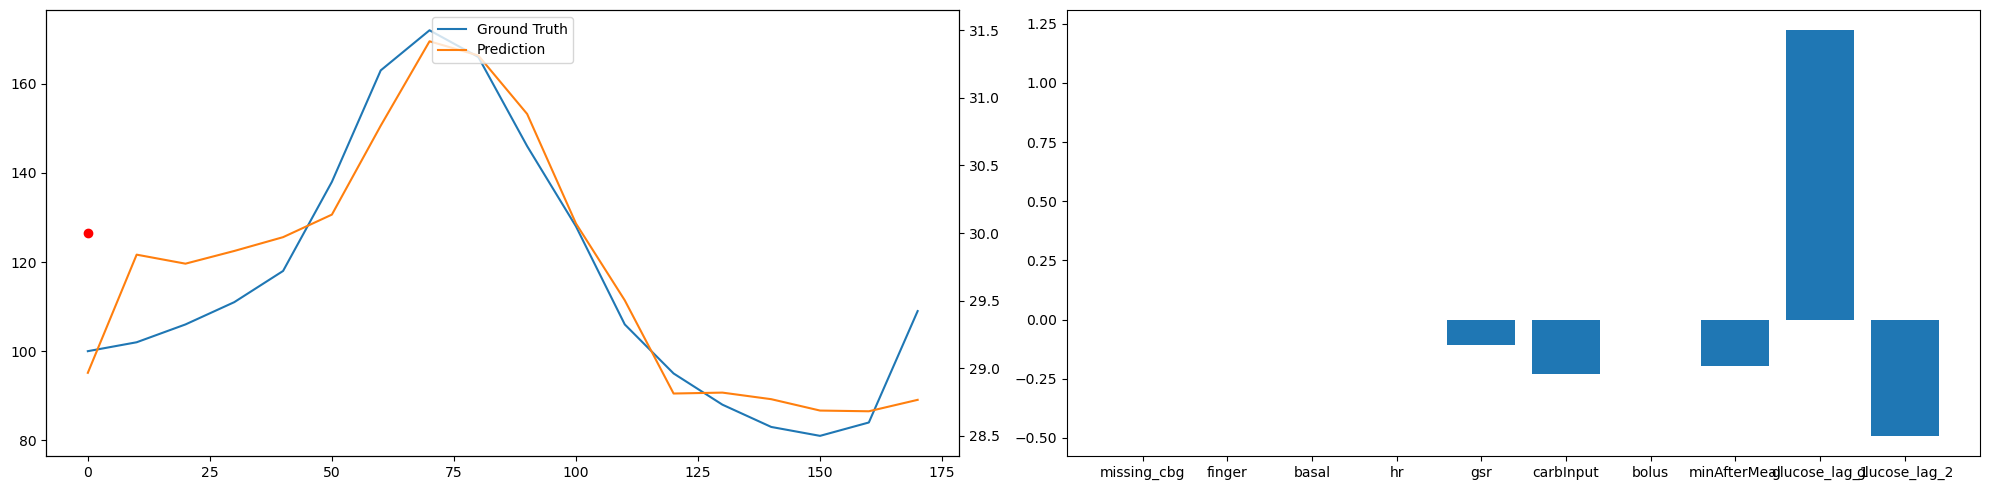

<Figure size 640x480 with 0 Axes>

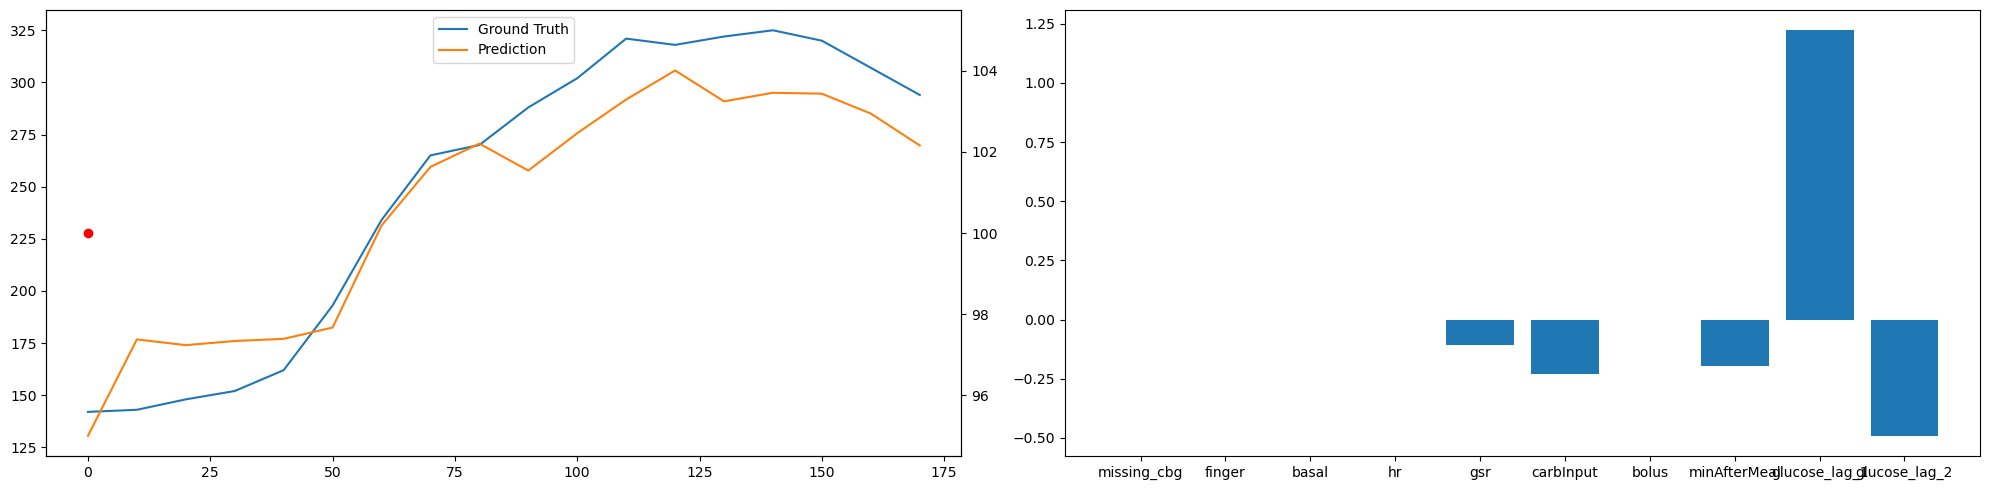

<Figure size 640x480 with 0 Axes>

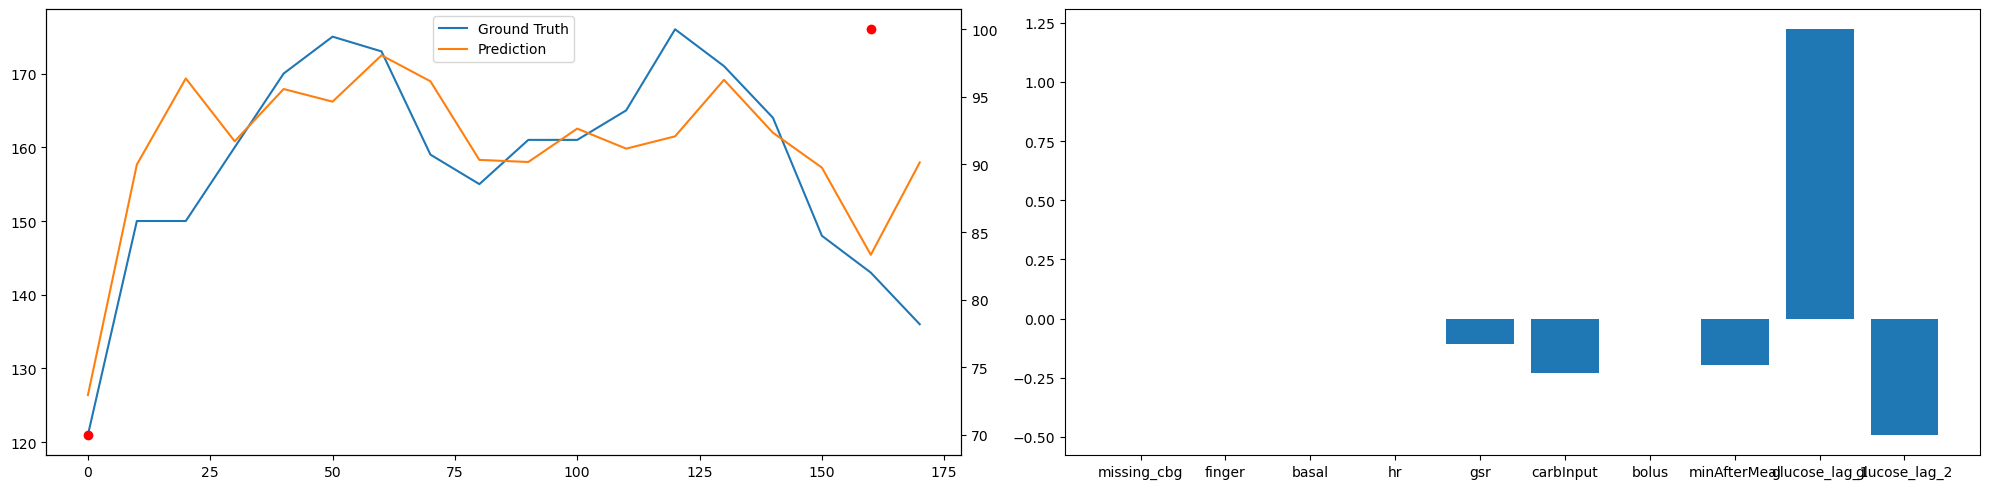

<Figure size 640x480 with 0 Axes>

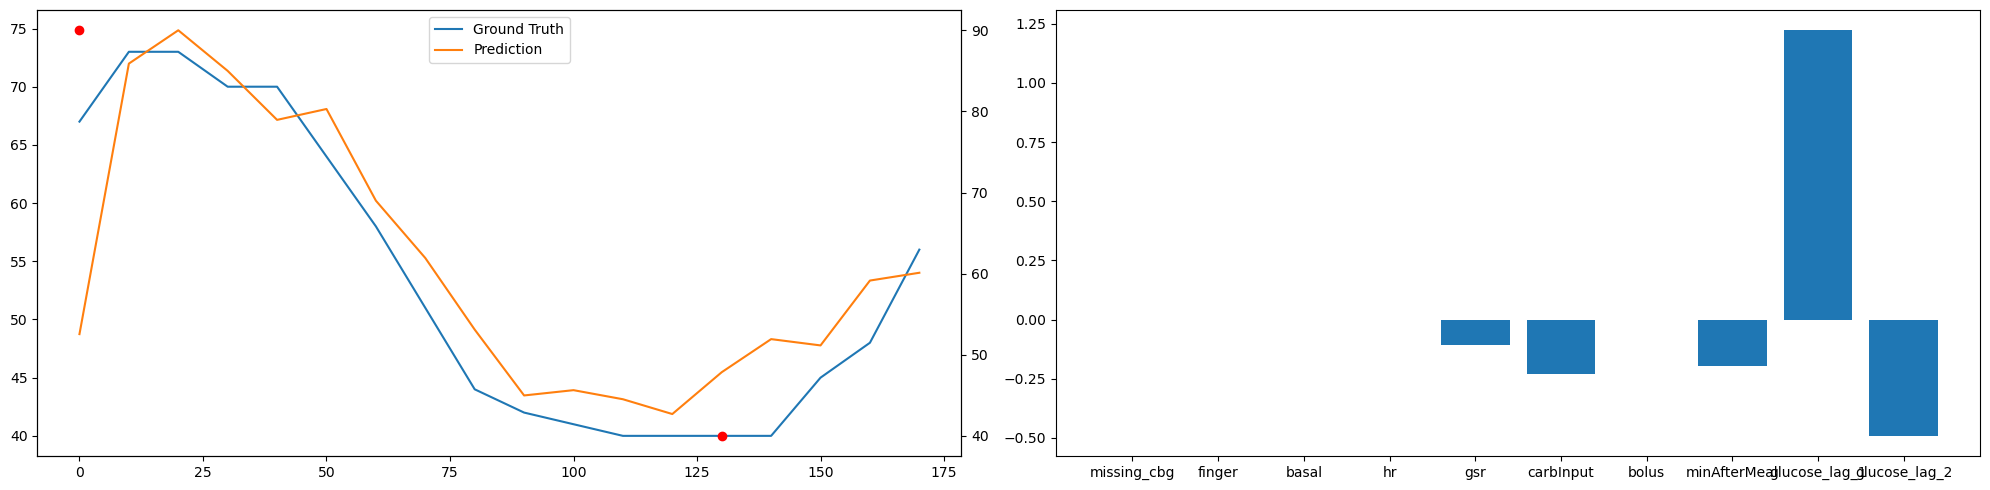

<Figure size 640x480 with 0 Axes>

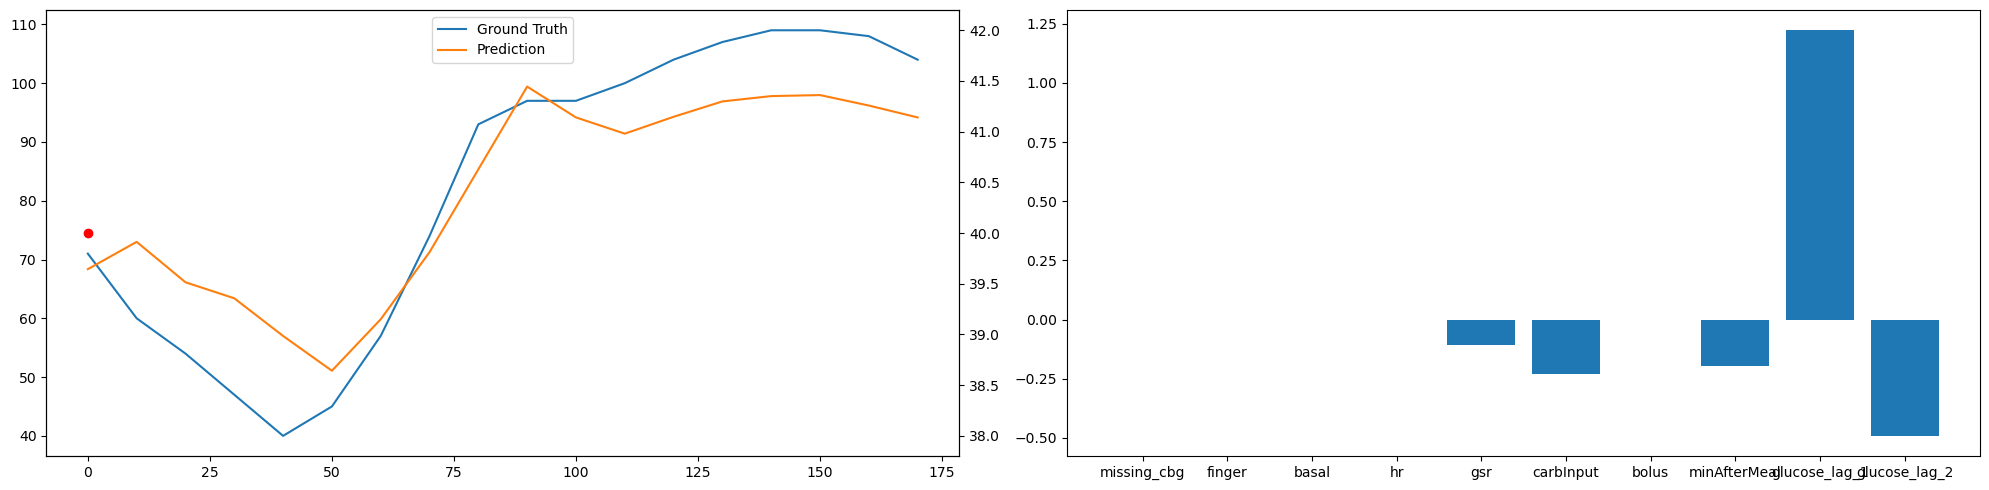

<Figure size 640x480 with 0 Axes>

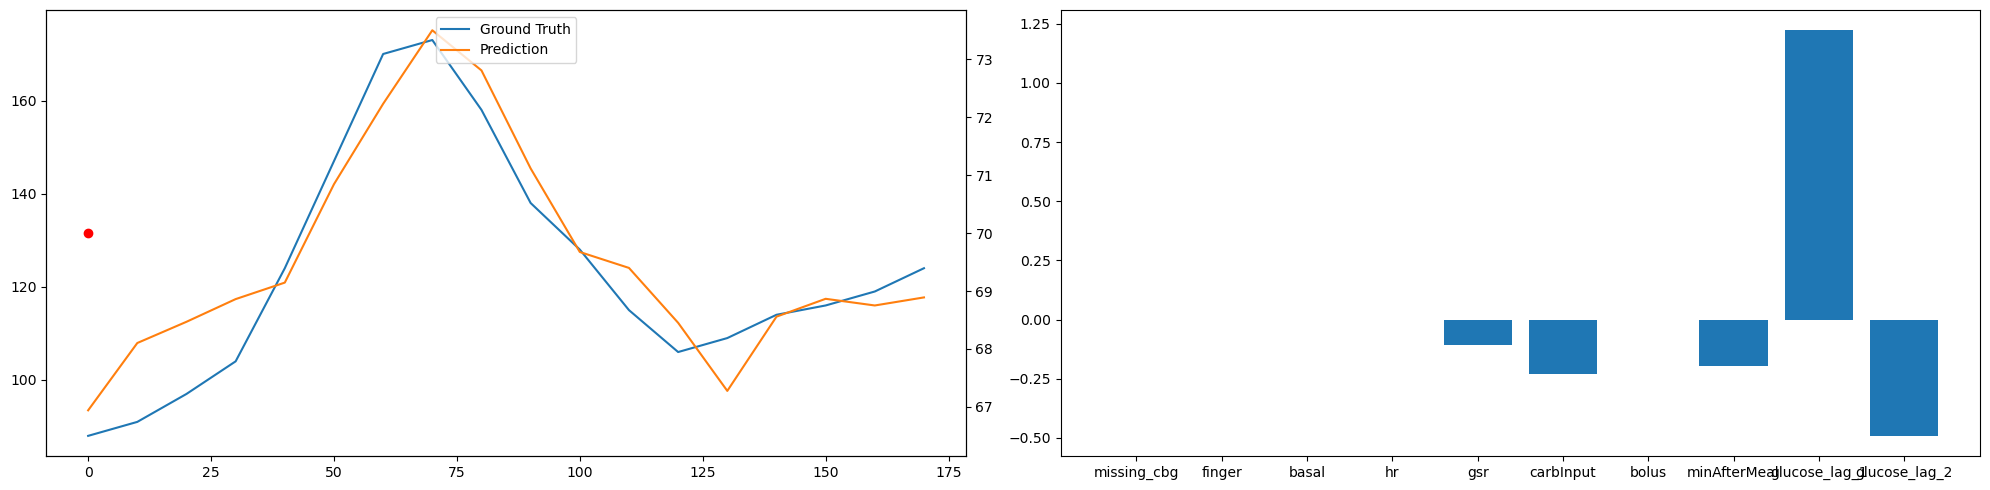

<Figure size 640x480 with 0 Axes>

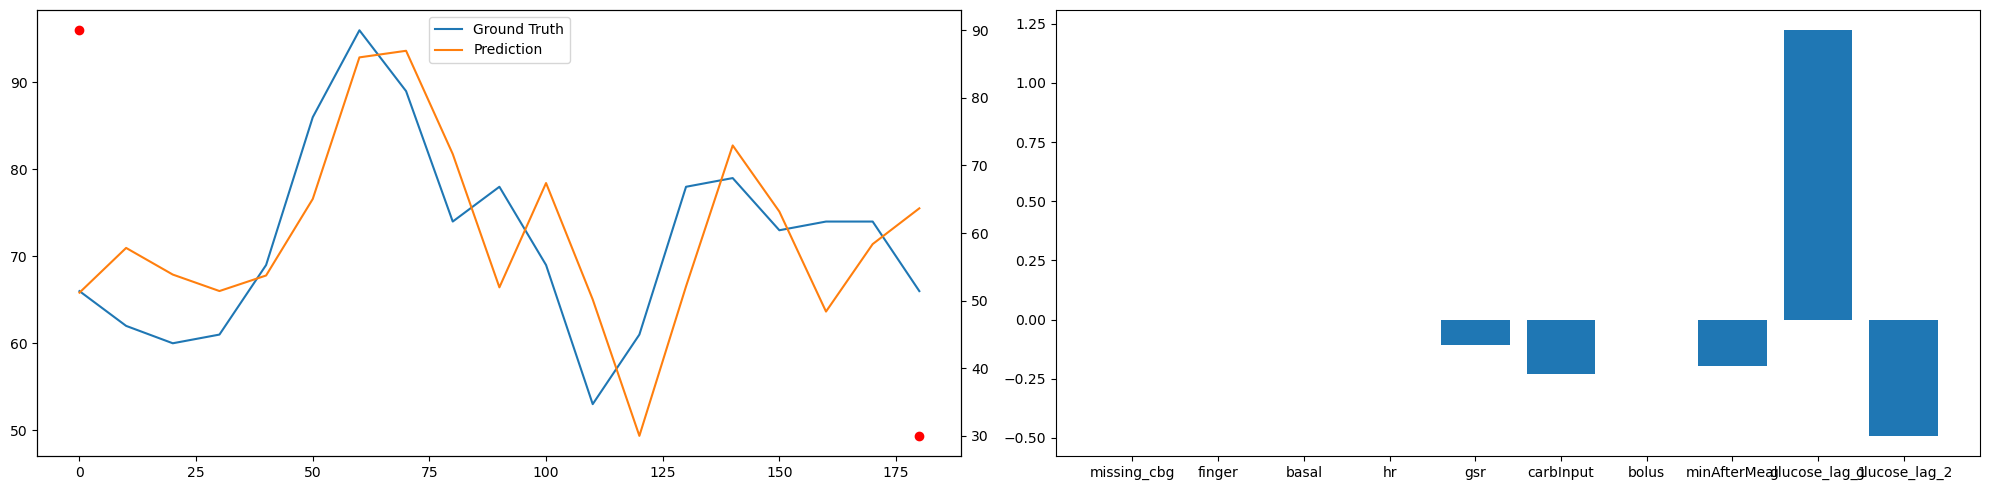

<Figure size 640x480 with 0 Axes>

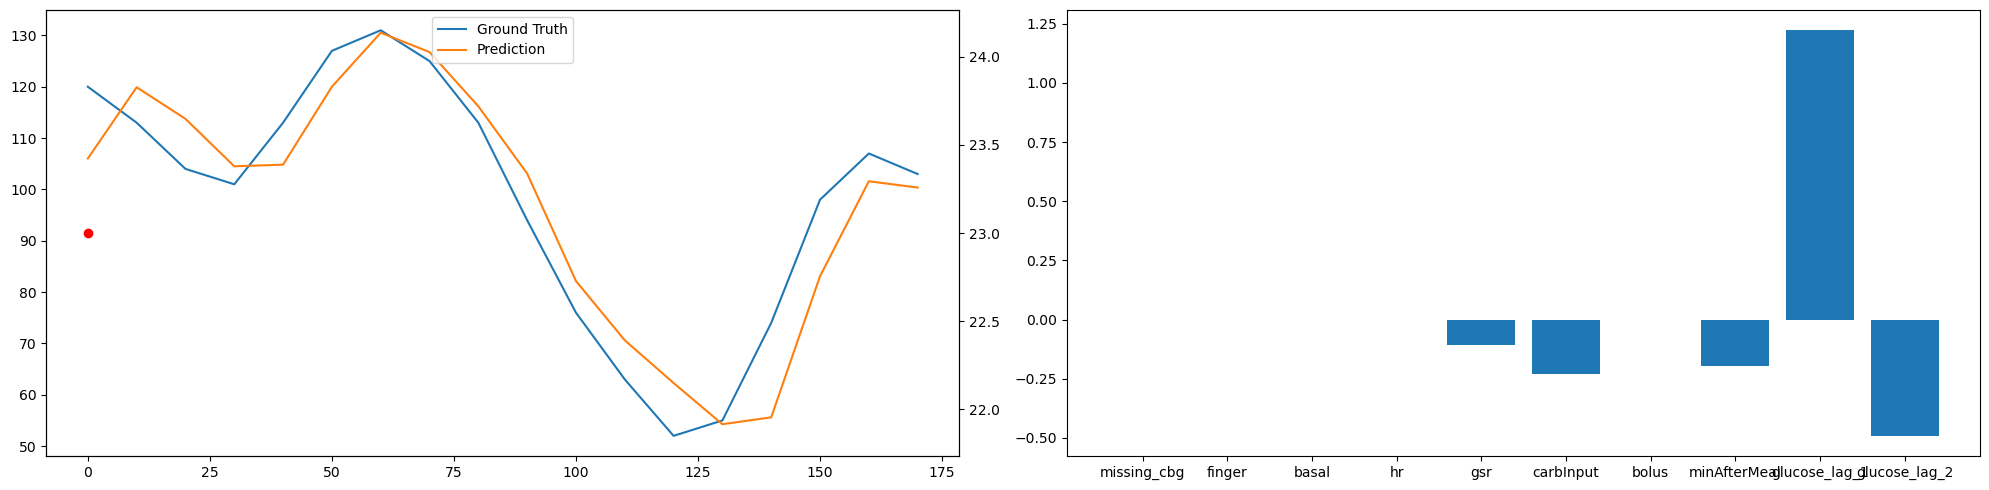

<Figure size 640x480 with 0 Axes>

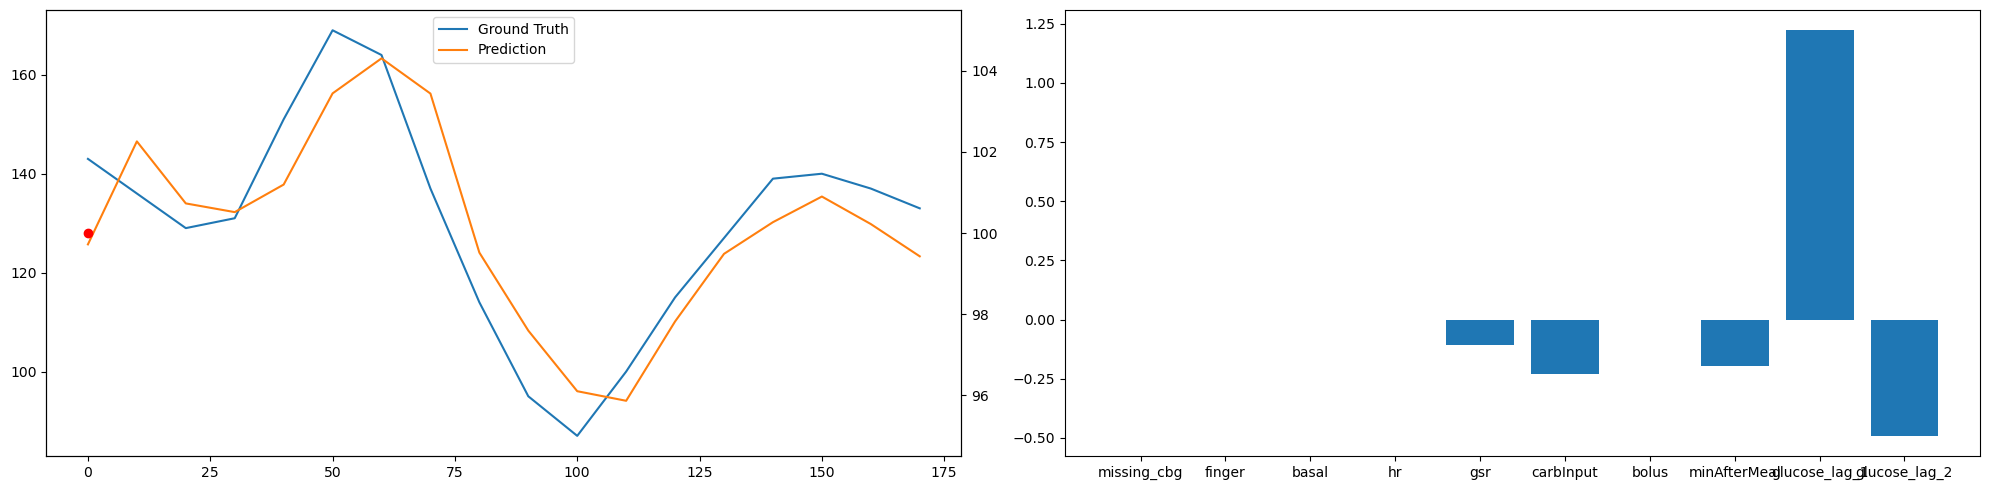

<Figure size 640x480 with 0 Axes>

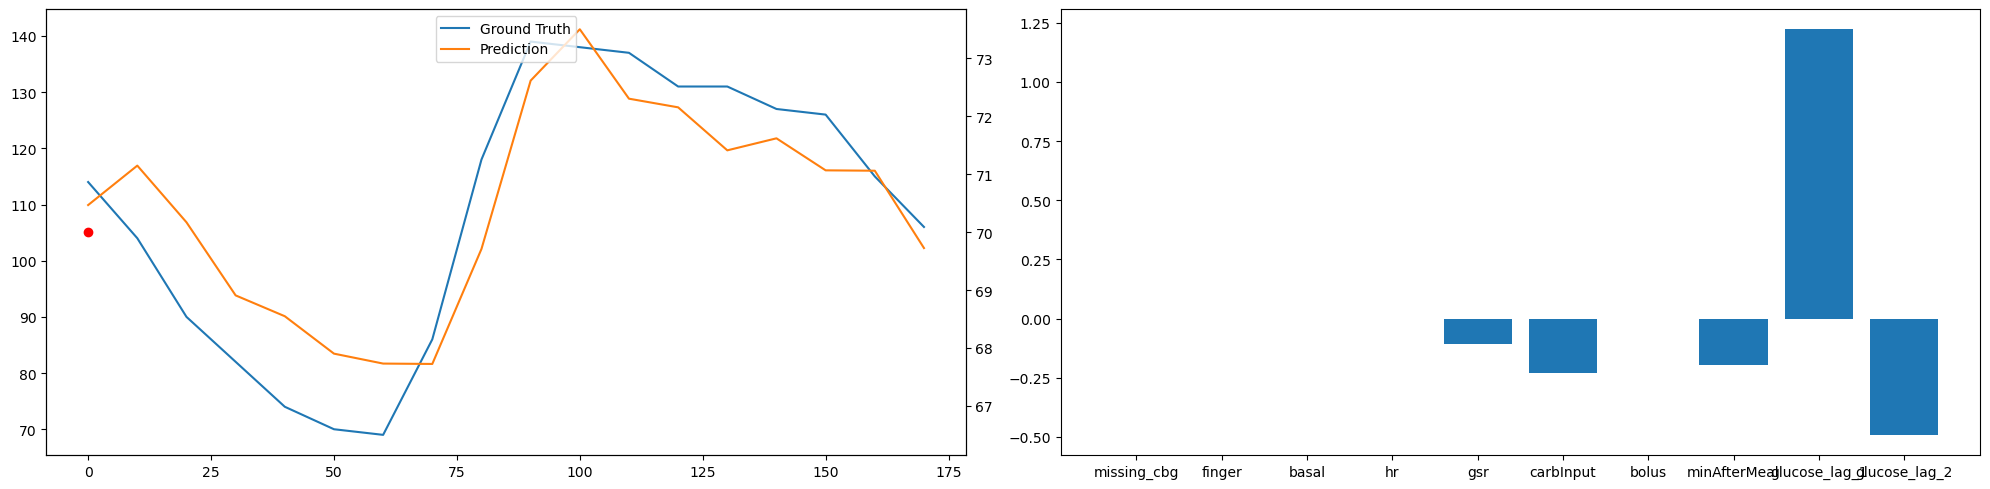

In [40]:
ensemble_model = LinearRegression()
ensemble_model.coef_ = averageCoef
for data in X_test:
    plt.figure()
    train_model(data, model, train=False)
    